# Import Libraries

In [1]:
import ee
import geemap
import pandas as pd
import numpy as np 
from matplotlib import pyplot
from io import StringIO


#ee.Authenticate()  # Only needed for the first time
ee.Initialize()
Map= geemap.Map()

In [2]:
lake = ee.FeatureCollection('projects/ee-mazarderakhsh/assets/ALTM_ALAP_Sta_coordinates') \
         .filter(ee.Filter.eq('Program', 'ALAP'))

Map.addLayer(lake)
Map.centerObject(lake, 16)
Map

Map(center=[44.08681380338949, -74.18753107321861], controls=(WidgetControl(options=['position', 'transparent_…

In [3]:
import ee

# Initialize the Earth Engine Python API
ee.Initialize()

# Define the FeatureCollection with your filters (using ee.Filter.Or)
feature_collection = ee.FeatureCollection('projects/ee-mazarderakhsh/assets/ALTM_ALAP_Sta_coordinates')\
    .filter(ee.Filter.Or(
        ee.Filter.eq('Program', 'ALAP'),
        ee.Filter.eq('Program', 'ALAP_ALTM')
    ))

# Get a list of unique lake names from the FeatureCollection
unique_lake_names = feature_collection.aggregate_array('Name').distinct()

# Convert the result to a Python list
lake_names_list = unique_lake_names.getInfo()
print(lake_names_list)

['Eighth Lake', 'Fawn Lake', 'Fifth Lake', 'Fourth Lake', 'Heavens Lake', 'Lake Algonquin', 'Lake Eaton', 'Lake Madeleine', 'Lake Placid', 'Lake Pleasant', 'Lower St. Regis Lake', 'Morehouse Lake', 'Oxbow Lake', 'Sacandaga Lake', 'Seventh Lake', 'Spitfire Lake', 'Spy Lake', 'Upper St. Regis Lake', 'Heart Lake', 'Limekiln Lake', 'Lake Rondaxe', 'Amber Lake', 'Lake of the Pines', 'Lake Roxanne', 'Alford Pond', 'Augur Lake', 'Austin Pond', 'Big Cherry Patch Pond', 'Butternut Pond', "Chase's Lake", 'Cranberry Lake', 'Echo Lake', 'Eli Pond', 'Fern Lake', 'Fish Creek East', 'Fish Creek Pond', 'Fish Creek West', 'Floodwood Pond', 'Franklin Falls Reservoir', 'Green Lake', 'Green Pond', 'Hidden Lake', 'Highlands Forge Lake', 'Horseshoe Pond', 'Indian Lake- Franklin County', 'Indian Lake- Hamilton County', 'Irving Pond', 'Jabe Pond', 'Jordan Lake', 'Lake Abanakee', 'Lake Adirondack', 'Lake Alice 2', 'Lake Colby', 'Lake Everest', 'Lake Flower', 'Lake Titus', 'Lens Lake', 'Little Polliwog Pond', '

In [4]:
print('Number of lakes in ALAP & ALAP_ALTM program:',feature_collection.size().getInfo())

Number of lakes in ALAP & ALAP_ALTM program: 158


In [5]:
import ee

# Initialize the Earth Engine Python API
ee.Initialize()

# Define the FeatureCollection with your filters
feature_collection = ee.FeatureCollection('projects/ee-mazarderakhsh/assets/ALTM_ALAP_Sta_coordinates')\
#     .filter(ee.Filter.eq('Program', 'ALAP'))

# Get a list of unique lake names from the FeatureCollection
unique_lake_names = feature_collection.aggregate_array('Name').distinct()

# Convert the result to a Python list
lake_names_list = unique_lake_names.getInfo()

# Iterate through the lake names and find the program for "Eighth Lake"
target_lake_name = "Big Moose Lake"
target_program = None

for lake_name in lake_names_list:
    if lake_name == target_lake_name:
        # Query the FeatureCollection to get the program for the target lake
        target_lake = feature_collection.filter(ee.Filter.eq('Name', target_lake_name)).first()
        target_program = target_lake.get('Program').getInfo()
        break

print(f"Program for {target_lake_name}: {target_program}")


Program for Big Moose Lake: ALAP_ALTM


In [6]:
# Get the number of lakes in the 'ALAP' program
number_of_lakes = lake.size().getInfo()

# Print the number of lakes
print('Number of lakes in ALAP program:', number_of_lakes)

Number of lakes in ALAP program: 149


In [7]:
# lakeBigMoosse = ee.FeatureCollection('projects/ee-mazarderakhsh/assets/ALTM_ALAP_Sta_coordinates') \
# #           .filter(ee.Filter.eq('Name', 'Eighth Lake'))

# Map.centerObject(lakeBigMoosse, 16)
# Map.addLayer(lakeBigMoosse)

# Map

In [8]:
# # Get the number of lakes in the 'ALAP' program
# number_of_lakes = lakeBigMoosse.size().getInfo()

# # Print the number of lakes
# print('Number of lakes in ALAP program:', number_of_lakes)
# # Number of lakes in ALAP program: 199

# Excel File

In [9]:
import pandas as pd

# Specify the file path
excel_file = 'AWI-ADK.xlsx'
# excel_LakeDepth = 'ALAP_Lake_DepthDATA.xlsx'

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(excel_file)

# Display the DataFrame (optional)
df 

,AWI Site ID,AWI Waterbody ID,Waterbody Name,Sample Location,Latitude,Longitude,Strata,Sample Date,Sample Time,Parameter,Reported Value,Units,Detection Flags,MDL Value
0,AWI00001.1,AWI00001,Lower St. Regis Lake,Deep Hole,44.427034,-74.248048,Surface,2002-06-20,NaN,Chlorophyll-a,8.81,µg/L,NaN,NaN
1,AWI00001.1,AWI00001,Lower St. Regis Lake,Deep Hole,44.427034,-74.248048,Surface,2002-07-09,NaN,Chlorophyll-a,9.15,µg/L,NaN,NaN
2,AWI00001.1,AWI00001,Lower St. Regis Lake,Deep Hole,44.427034,-74.248048,Surface,2002-08-21,NaN,Chlorophyll-a,7.39,µg/L,NaN,NaN
3,AWI00001.1,AWI00001,Lower St. Regis Lake,Deep Hole,44.427034,-74.248048,Surface,2003-06-27,NaN,Chlorophyll-a,6.70,µg/L,NaN,NaN
4,AWI00001.1,AWI00001,Lower St. Regis Lake,Deep Hole,44.427034,-74.248048,Surface,2003-07-18,NaN,Chlorophyll-a,6.02,µg/L,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8730,AWI00319.1,AWI00319,Ragged Lake,Main,44.718620,-74.069780,Surface,2022-09-17,NaN,CDOM,283.37,µg/L QSE,NaN,MDL 0.0
8731,AWI00319.1,AWI00319,Ragged Lake,Main,44.718620,-74.069780,Surface,2022-09-17,NaN,Chlorophyll-a,9.23,µg/L,NaN,MDL 0.025
8732,AWI00319.1,AWI00319,Ragged Lake,Main,44.718620,-74.069780,Surface,2022-10-11,11:45:00,Dissolved Organic Carbon,11.94,mg/L,NaN,MDL 0.5
8733,AWI00319.1,AWI00319,Ragged Lake,Main,44.718620,-74.069780,Surface,2022-10-11,11:45:00,CDOM,317.36,µg/L QSE,NaN,MDL 0.0


In [10]:
import pandas as pd

# Specify the file path
excel_LakeDepth = 'ALAP_DATA.xlsx'

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(excel_LakeDepth)

# Display the DataFrame (optional)
df 

,Waterbody Name,LAT,LON,LAKE_DEPTH (m),SURFACE_AREA (ha),TROPHIC_STATE
0,Alford Pond,44.261678,-74.036620,0.6,15.5,Mesotrophic
1,Amber Lake,44.400339,-74.617543,2.1,45,Eutrophic
2,Arbutus Pond,43.987874,-74.241701,-,48,Oligotrophic
3,Augur Lake,44.460665,-73.492557,6.4,146,Mesotrophic
4,Austin Pond,43.676423,-73.964335,-,9,Mesotrophic
...,...,...,...,...,...,...
153,Whey Pond,44.307694,-74.392854,6.1,47.4,Mesotrophic
154,White Lake,43.543891,-75.152214,22.9,97,Oligotrophic
155,Windover Lake,43.632604,-74.012938,3.1,38,Mesotrophic
156,Wolf Lake,44.020581,-74.219673,-,59,Oligotrophic


In [11]:
import pandas as pd

# Specify the file paths
excel_file = 'AWI-ADK.xlsx'
excel_LakeDepth = 'ALAP_DATA.xlsx'

# Read the Excel files into pandas DataFrames
df1 = pd.read_excel(excel_file)
df2 = pd.read_excel(excel_LakeDepth)

# Merge the two DataFrames based on a common column (for example, 'common_column_name')
merged_df = pd.merge(df1, df2, on='Waterbody Name', how='inner')  # You can change 'inner' to other join types if needed

# Display the merged DataFrame
merged_df

,AWI Site ID,AWI Waterbody ID,Waterbody Name,Sample Location,Latitude,Longitude,Strata,Sample Date,Sample Time,Parameter,Reported Value,Units,Detection Flags,MDL Value,LAT,LON,LAKE_DEPTH (m),SURFACE_AREA (ha),TROPHIC_STATE
0,AWI00001.1,AWI00001,Lower St. Regis Lake,Deep Hole,44.427034,-74.248048,Surface,2002-06-20,NaN,Chlorophyll-a,8.81,µg/L,NaN,NaN,44.427034,-74.248048,-,-,-
1,AWI00001.1,AWI00001,Lower St. Regis Lake,Deep Hole,44.427034,-74.248048,Surface,2002-07-09,NaN,Chlorophyll-a,9.15,µg/L,NaN,NaN,44.427034,-74.248048,-,-,-
2,AWI00001.1,AWI00001,Lower St. Regis Lake,Deep Hole,44.427034,-74.248048,Surface,2002-08-21,NaN,Chlorophyll-a,7.39,µg/L,NaN,NaN,44.427034,-74.248048,-,-,-
3,AWI00001.1,AWI00001,Lower St. Regis Lake,Deep Hole,44.427034,-74.248048,Surface,2003-06-27,NaN,Chlorophyll-a,6.70,µg/L,NaN,NaN,44.427034,-74.248048,-,-,-
4,AWI00001.1,AWI00001,Lower St. Regis Lake,Deep Hole,44.427034,-74.248048,Surface,2003-07-18,NaN,Chlorophyll-a,6.02,µg/L,NaN,NaN,44.427034,-74.248048,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7759,AWI00319.1,AWI00319,Ragged Lake,Main,44.718620,-74.069780,Surface,2022-09-17,NaN,CDOM,283.37,µg/L QSE,NaN,MDL 0.0,44.718620,-74.069780,-,-,Mesotrophic
7760,AWI00319.1,AWI00319,Ragged Lake,Main,44.718620,-74.069780,Surface,2022-09-17,NaN,Chlorophyll-a,9.23,µg/L,NaN,MDL 0.025,44.718620,-74.069780,-,-,Mesotrophic
7761,AWI00319.1,AWI00319,Ragged Lake,Main,44.718620,-74.069780,Surface,2022-10-11,11:45:00,Dissolved Organic Carbon,11.94,mg/L,NaN,MDL 0.5,44.718620,-74.069780,-,-,Mesotrophic
7762,AWI00319.1,AWI00319,Ragged Lake,Main,44.718620,-74.069780,Surface,2022-10-11,11:45:00,CDOM,317.36,µg/L QSE,NaN,MDL 0.0,44.718620,-74.069780,-,-,Mesotrophic


# CDOM

In [12]:
# filtered_df = df[df['Waterbody Name'] == 'Big Moose Lake']
filtered_df = merged_df[merged_df['Parameter'] == 'CDOM']
# filtered_df = df[(df['Waterbody Name'] == 'Big Moose Lake') & (df['Parameter'] == 'CDOM')]

filtered_df['Reported Value'] = filtered_df['Reported Value'] * 0.05 #reduce cdom value by 10% from original value

filtered_df = filtered_df.rename(columns={'Sample Date': 'DATE_SMP'})
# filtered_df = filtered_df.rename(columns={'Reported Value': 'CDOM_Value'})

filtered_df

,AWI Site ID,AWI Waterbody ID,Waterbody Name,Sample Location,Latitude,Longitude,Strata,DATE_SMP,Sample Time,Parameter,Reported Value,Units,Detection Flags,MDL Value,LAT,LON,LAKE_DEPTH (m),SURFACE_AREA (ha),TROPHIC_STATE
63,AWI00001.1,AWI00001,Lower St. Regis Lake,Deep Hole,44.427034,-74.248048,Surface,2017-06-21,NaN,CDOM,7.4295,µg/L QSE,NaN,MDL 0.0,44.427034,-74.248048,-,-,-
66,AWI00001.1,AWI00001,Lower St. Regis Lake,Deep Hole,44.427034,-74.248048,Surface,2017-07-21,12:00:00,CDOM,9.2465,µg/L QSE,NaN,MDL 0.0,44.427034,-74.248048,-,-,-
69,AWI00001.1,AWI00001,Lower St. Regis Lake,Deep Hole,44.427034,-74.248048,Surface,2017-08-03,NaN,CDOM,8.5705,µg/L QSE,NaN,MDL 0.0,44.427034,-74.248048,-,-,-
72,AWI00001.1,AWI00001,Lower St. Regis Lake,Deep Hole,44.427034,-74.248048,Surface,2017-08-30,NaN,CDOM,9.0800,µg/L QSE,NaN,MDL 0.0,44.427034,-74.248048,-,-,-
75,AWI00001.1,AWI00001,Lower St. Regis Lake,Deep Hole,44.427034,-74.248048,Surface,2017-09-27,NaN,CDOM,8.2000,µg/L QSE,NaN,MDL 0.0,44.427034,-74.248048,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7750,AWI00317.1,AWI00317,Bartlett Pond,Deep Hole,44.106152,-73.511043,Surface,2022-08-16,14:45:00,CDOM,5.4625,µg/L QSE,NaN,MDL 0.0,44.106152,-73.511043,6.1,40,Oligotrophic
7753,AWI00317.1,AWI00317,Bartlett Pond,Deep Hole,44.106152,-73.511043,Surface,2022-09-20,14:52:00,CDOM,7.7010,µg/L QSE,NaN,MDL 0.0,44.106152,-73.511043,6.1,40,Oligotrophic
7756,AWI00319.1,AWI00319,Ragged Lake,Main,44.718620,-74.069780,Surface,2022-08-12,11:45:00,CDOM,14.6545,µg/L QSE,NaN,MDL 0.0,44.718620,-74.069780,-,-,Mesotrophic
7759,AWI00319.1,AWI00319,Ragged Lake,Main,44.718620,-74.069780,Surface,2022-09-17,NaN,CDOM,14.1685,µg/L QSE,NaN,MDL 0.0,44.718620,-74.069780,-,-,Mesotrophic


In [13]:
# Drop 'LAT' and 'LON' columns from filtered_df
filtered_df.drop(columns=['LAT', 'LON', 'Detection Flags', 'Sample Time'], inplace=True)

# Now filtered_df does not contain the 'LAT' and 'LON' columns
filtered_df

,AWI Site ID,AWI Waterbody ID,Waterbody Name,Sample Location,Latitude,Longitude,Strata,DATE_SMP,Parameter,Reported Value,Units,MDL Value,LAKE_DEPTH (m),SURFACE_AREA (ha),TROPHIC_STATE
63,AWI00001.1,AWI00001,Lower St. Regis Lake,Deep Hole,44.427034,-74.248048,Surface,2017-06-21,CDOM,7.4295,µg/L QSE,MDL 0.0,-,-,-
66,AWI00001.1,AWI00001,Lower St. Regis Lake,Deep Hole,44.427034,-74.248048,Surface,2017-07-21,CDOM,9.2465,µg/L QSE,MDL 0.0,-,-,-
69,AWI00001.1,AWI00001,Lower St. Regis Lake,Deep Hole,44.427034,-74.248048,Surface,2017-08-03,CDOM,8.5705,µg/L QSE,MDL 0.0,-,-,-
72,AWI00001.1,AWI00001,Lower St. Regis Lake,Deep Hole,44.427034,-74.248048,Surface,2017-08-30,CDOM,9.0800,µg/L QSE,MDL 0.0,-,-,-
75,AWI00001.1,AWI00001,Lower St. Regis Lake,Deep Hole,44.427034,-74.248048,Surface,2017-09-27,CDOM,8.2000,µg/L QSE,MDL 0.0,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7750,AWI00317.1,AWI00317,Bartlett Pond,Deep Hole,44.106152,-73.511043,Surface,2022-08-16,CDOM,5.4625,µg/L QSE,MDL 0.0,6.1,40,Oligotrophic
7753,AWI00317.1,AWI00317,Bartlett Pond,Deep Hole,44.106152,-73.511043,Surface,2022-09-20,CDOM,7.7010,µg/L QSE,MDL 0.0,6.1,40,Oligotrophic
7756,AWI00319.1,AWI00319,Ragged Lake,Main,44.718620,-74.069780,Surface,2022-08-12,CDOM,14.6545,µg/L QSE,MDL 0.0,-,-,Mesotrophic
7759,AWI00319.1,AWI00319,Ragged Lake,Main,44.718620,-74.069780,Surface,2022-09-17,CDOM,14.1685,µg/L QSE,MDL 0.0,-,-,Mesotrophic


In [14]:
filtered_df = filtered_df[~filtered_df.applymap(lambda x: isinstance(x, (str, bytes)) and '-' in x).any(axis=1)]
# # Set pandas options to display all rows and columns
# pd.set_option('display.max_rows', None)

filtered_df

,AWI Site ID,AWI Waterbody ID,Waterbody Name,Sample Location,Latitude,Longitude,Strata,DATE_SMP,Parameter,Reported Value,Units,MDL Value,LAKE_DEPTH (m),SURFACE_AREA (ha),TROPHIC_STATE
606,AWI00004.1,AWI00004,Butternut Pond,Deep Hole,44.430696,-73.495663,Surface,2018-08-27,CDOM,5.0390,µg/L QSE,MDL 0.0,6.3,65.8,Mesotrophic
609,AWI00004.1,AWI00004,Butternut Pond,Deep Hole,44.430696,-73.495663,Surface,2019-06-26,CDOM,5.4835,µg/L QSE,MDL 0.0,6.3,65.8,Mesotrophic
612,AWI00004.1,AWI00004,Butternut Pond,Deep Hole,44.430696,-73.495663,Surface,2019-07-18,CDOM,4.5930,µg/L QSE,MDL 0.0,6.3,65.8,Mesotrophic
615,AWI00004.1,AWI00004,Butternut Pond,Deep Hole,44.430696,-73.495663,Surface,2019-08-22,CDOM,4.3650,µg/L QSE,MDL 0.0,6.3,65.8,Mesotrophic
618,AWI00004.1,AWI00004,Butternut Pond,Deep Hole,44.430696,-73.495663,Surface,2020-08-25,CDOM,6.1545,µg/L QSE,MDL 0.0,6.3,65.8,Mesotrophic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7741,AWI00317.1,AWI00317,Bartlett Pond,Deep Hole,44.106152,-73.511043,Surface,2022-05-19,CDOM,6.0155,µg/L QSE,MDL 0.0,6.1,40,Oligotrophic
7744,AWI00317.1,AWI00317,Bartlett Pond,Deep Hole,44.106152,-73.511043,Surface,2022-06-24,CDOM,5.7700,µg/L QSE,MDL 0.0,6.1,40,Oligotrophic
7747,AWI00317.1,AWI00317,Bartlett Pond,Deep Hole,44.106152,-73.511043,Surface,2022-07-13,CDOM,5.5855,µg/L QSE,MDL 0.0,6.1,40,Oligotrophic
7750,AWI00317.1,AWI00317,Bartlett Pond,Deep Hole,44.106152,-73.511043,Surface,2022-08-16,CDOM,5.4625,µg/L QSE,MDL 0.0,6.1,40,Oligotrophic


In [15]:
# unique_waterbody_names = filtered_df["Waterbody Name"].unique()
# unique_waterbody_names

In [16]:
num_rows = filtered_df.shape[0]
print("Number of rows in filtered_df:", num_rows)

Number of rows in filtered_df: 1078


# Reflectance

In [17]:
# Function to create a five-sided polygon around the latitude and longitude
import ee
import geemap

# Function to create a five-sided polygon around the latitude and longitude
def create_lake_polygon(lat, lon):
    # Assuming each pixel is approximately 20 meters in size
    buffer_distance_meters = 3 * 20

   
    # Convert buffer distance from meters to degrees (approximate conversion)
    buffer_distance_degrees = buffer_distance_meters / 111320.0

    # Define the coordinates of the five vertices of the polygon
    coordinates = [
        [lon, lat + buffer_distance_degrees],
        [lon + buffer_distance_degrees, lat + buffer_distance_degrees / 2],
        [lon + buffer_distance_degrees / 2, lat - buffer_distance_degrees / 2],
        [lon - buffer_distance_degrees / 2, lat - buffer_distance_degrees / 2],
        [lon - buffer_distance_degrees, lat + buffer_distance_degrees / 2]
    ]

    # Create the polygon geometry
    polygon = ee.Geometry.Polygon(coordinates)

    return polygon


In [18]:
lake = ee.FeatureCollection('projects/ee-mazarderakhsh/assets/ALTM_ALAP_Sta_coordinates')\
                .filter(ee.Filter.eq('Name','Round Pond'))


lat = ee.Number(lake.first().geometry().coordinates().get(1)).getInfo()
lon = ee.Number(lake.first().geometry().coordinates().get(0)).getInfo()

lake_polygon = ee.Geometry.Point(lon, lat).buffer(100)


Map.addLayer(lake_polygon)
Map.addLayer(lake)

Map.centerObject(lake_polygon, 16)
Map

Map(center=[43.35228128251941, -73.67690176857664], controls=(WidgetControl(options=['position', 'transparent_…

In [19]:
import ee
import geemap
import pandas as pd
import numpy as np 
from matplotlib import pyplot
from io import StringIO


Map= geemap.Map()
ee.Initialize()

# The list lake_names contains 83 lake names.
# Create a list of 83 lake names
lake_names = ['Eighth Lake', 'Fawn Lake', 'Fifth Lake', 'Fourth Lake', 'Heavens Lake', 'Lake Algonquin', 'Lake Eaton', 
              'Lake Madeleine', 'Lake Placid', 'Lake Pleasant', 'Lower St. Regis Lake', 'Morehouse Lake', 'Oxbow Lake', 
              'Sacandaga Lake', 'Seventh Lake', 'Spitfire Lake', 'Spy Lake', 'Upper St. Regis Lake', 'Heart Lake', 
              'Limekiln Lake', 'Lake Rondaxe', 'Amber Lake', 'Lake of the Pines', 'Lake Roxanne', 'Alford Pond', 
              'Augur Lake', 'Austin Pond', 'Big Cherry Patch Pond', 'Butternut Pond', "Chase's Lake", 'Cranberry Lake', 
              'Echo Lake', 'Eli Pond', 'Fern Lake', 'Fish Creek East', 'Fish Creek Pond', 'Fish Creek West', 
              'Floodwood Pond', 'Franklin Falls Reservoir', 'Green Lake', 'Green Pond', 'Hidden Lake', 
              'Highlands Forge Lake', 'Horseshoe Pond', 'Indian Lake- Franklin County', 'Indian Lake- Hamilton County', 
              'Irving Pond', 'Jabe Pond', 'Jordan Lake', 'Lake Abanakee', 'Lake Adirondack', 'Lake Alice 2', 'Lake Colby', 
              'Lake Everest', 'Lake Flower', 'Lake Titus', 'Lens Lake', 'Little Polliwog Pond', 'Little Rainbow Pond', 
              'Little Square Pond', 'Long Pond- Essex County', 'Long Pond- Franklin County', 'Loon Lake- Warren County', 
              'Lower Ausable Lake', 'Lower Beaver Pond', 'Lower Chateaugay Lake', 'McCauley Pond', 'Middle Saranac Lake', 
              'Moody Pond', 'Mountain View Lake', 'Oseetah Lake', 'Osgood Pond', 'Otter Pond', 'Owl Pond', 'Penfield Pond',
              'Putnam Pond', 'Ragged Lake', 'Rainbow Lake', 'Rat Pond', 'Rollins Pond', 'Rush Pond', 'Slang Pond', 
              'Trout Pond', 'Union Falls Reservoir', 'Upper Chateaugay Lake', 'Upper Saranac Lake', 'Whey Pond', 
              'Windover Lake', 'Hewitt Lake', 'Bartlett Pond', 'Blue Mountain Lake', 'Bone Pond', 'Brandreth Lake', 
              'Canada Lake', 'Catlin Lake', 'Chapel Pond', 'Chazy Lake', 'Connery Pond', 'Deer Lake', 'Eagle Lake', 
              'East Caroga Lake', 'East Pine Pond', 'Follensby Clear Pond', 'Frank Pond', 'Friends Lake', 'Garnet Lake', 
              'Gordon Pond', 'Gull Pond', 'Hoel Pond', 'Holcomb Pond', 'Kiwassa Lake', 'Lake Alice', 'Lake Clear', 
              'Lake Durant', 'Lake Kushaqua', 'Little Green Pond', 'Little Jabe Pond', 'Little Long Lake', 'Long Lake', 
              'Loon Lake- Franklin County', 'Lower Cascade Lake', 'Lower Saranac Lake', 'Mink Pond', 'Mirror Lake', 
              'Moose Pond', 'Paradox Lake', 'Pine Lake', 'Pine Pond', 'Pleasant Lake', 'Polliwog Pond', 'Raquette Lake', 
              'Rich Lake', 'Round Pond', 'Schroon Lake', 'Silver Lake', 'Simon Pond', 'Split Rock Pond', 'Star Lake', 
              'Stony Creek Pond', 'Taylor Pond', 'Thirteenth Lake', 'Tripp Lake', 'Trout Lake', 'Tupper Lake', 'Turtle Pond', 
              'Twitchell Lake', 'Upper Ausable Lake', 'Upper Cascade Lake', 'West Caroga Lake', 'White Lake', 'Wolf Lake', 'Zack Pond', 
              'Copperas Pond', 'Arbutus Pond', 'Moss Lake', 'Big Moose Lake', 'Black Pond', 'Clear Pond']
# The list lake_names contains 83 lake names.

# sentinel2_bands =['B1','B2','B3','B4','B5','B6','B8','B8A','B11']
# STD_NAMES = ['Aerosols', 'Blue', 'Green', 'Red', 'RedEdge1','RedEdge2','RedEdge4','NIR','SWIR1']

sentinel2_bands =['B1','B2','B3','B4','B5','B6','B8','B8A','B11']
STD_NAMES = ['Aerosols', 'Blue', 'Green', 'Red', 'RedEdge1','RedEdge2','RedEdge4','NIR','SWIR1']


# Define the function to mask clouds and cloud shadows from Landsat 5 surface reflectance imagery
def maskS2clouds(image):
    qa = image.select('QA60')
    # Bits 10 and 11 are clouds and cirrus, respectively.
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11

    # Create the cloud mask
    cloudMask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))

    # Apply the cloud mask to the image
    maskedImage = image.updateMask(cloudMask)

    return maskedImage


# Define the function to compute the mean reflectance values for the specified bands within the region of interest (lake)
def reflectance(img, lake):
    reflectance_values = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=lake_polygon, scale=30).select(STD_NAMES)
    return img.set('DATE_SMP', img.date().format()).set('reflectance', reflectance_values)

# Initialize an empty list to store the dataframes for each lake
dfs = []

# Create a dictionary to map each lake name to a numerical label
lake_name_to_label = {lake_name: i for i, lake_name in enumerate(lake_names)}

# Loop through each lake name and retrieve Landsat 5 imagery for that lake
for Waterbody_Name in lake_names:
    # Retrieve Landsat 5 imagery for the specific lake
#     lake = ee.FeatureCollection('projects/ee-touhedakhanom14/assets/stations-coord')\
#         .filter(ee.Filter.eq('SITE_NAME', SITE_NAME))
#     lake = filtered_df[filtered_df['Waterbody Name'] == Waterbody_Name]
#     if not lake.empty: 
#         lat = lake['Latitude'].values[0]
#         lon = lake['Longitude'].values[0]

#     station = ee.Geometry.Point(lat,lon)
   
    lake = ee.FeatureCollection('projects/ee-mazarderakhsh/assets/ALTM_ALAP_Sta_coordinates')\
                .filter(ee.Filter.eq('Name', Waterbody_Name)) \
                .filter(ee.Filter.Or(
                    ee.Filter.eq('Program', 'ALAP'),
                    ee.Filter.eq('Program', 'ALAP_ALTM')
    ))

    lat = ee.Number(lake.first().geometry().coordinates().get(1)).getInfo()
    lon = ee.Number(lake.first().geometry().coordinates().get(0)).getInfo()

#     lake_polygon = ee.Geometry.Point(lon, lat).buffer(1000)

    lake_polygon = create_lake_polygon(lon, lat)

    s2 = ee.ImageCollection('COPERNICUS/S2_SR') \
    .filter(ee.Filter.calendarRange(2019, 2023, 'year')) \
    .map(maskS2clouds) \
    .select(sentinel2_bands, STD_NAMES)\
    .filterBounds(lake_polygon) \
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 50))

    # Map the reflectance function over the Landsat 5 ImageCollection for the specific lake
    map_reflectance = s2.map(lambda img: reflectance(img, lake_polygon))

    # Reduce the mapped image collection to get reflectance values for the specific lake
    list_reflectance = map_reflectance.reduceColumns(ee.Reducer.toList(2), ['DATE_SMP', 'reflectance']).values().get(0)

    # Convert the results to a pandas DataFrame
    df_reflectance = pd.DataFrame(list_reflectance.getInfo(), columns=['DATE_SMP', 'reflectance'])
    df_reflectance['DATE_SMP'] = pd.to_datetime(df_reflectance['DATE_SMP'])
    df_reflectance['DATE_SMP'] = df_reflectance['DATE_SMP'].dt.date
    df_reflectance['reflectance'] = df_reflectance['reflectance'].apply(lambda x: {k: v/10000 for k, v in x.items() if v is not None})

    # Unpack the 'reflectance' dictionary and create separate columns for each band
    df_reflectance = pd.concat([df_reflectance.drop('reflectance', axis=1),
                                df_reflectance['reflectance'].apply(pd.Series).astype('float64', errors='ignore')], axis=1)

    # Add a new column for the lake name
    df_reflectance['Waterbody Name'] =  Waterbody_Name
    
    # Add a new column for the lake label (numeric representation)
    df_reflectance['LAKE_LABEL'] = lake_name_to_label[Waterbody_Name]

    # Add the DataFrame to the list
    dfs.append(df_reflectance)
    
    

# Concatenate all DataFrames into a single DataFrame
df_all_lakes = pd.concat(dfs, ignore_index=True)

# Sort the DataFrame by 'DATE_SMP' in ascending order
df_all_lakes.sort_values(by='DATE_SMP', inplace=True)

df_all_lakes.dropna(inplace=True)

In [20]:
# 10003 rows × 12 columns
df_all_lakes

,DATE_SMP,Aerosols,Blue,Green,NIR,Red,RedEdge1,RedEdge2,RedEdge4,SWIR1,Waterbody Name,LAKE_LABEL
2698,2021-09-22,0.874098,0.840672,0.827456,0.711245,0.789880,0.788887,0.769805,0.710418,0.136883,Lake of the Pines,22
2697,2021-09-22,0.870342,0.844055,0.834939,0.713839,0.794127,0.789332,0.767589,0.712223,0.136571,Lake of the Pines,22
17441,2021-09-25,0.888773,0.879449,0.874546,0.783985,0.841881,0.856743,0.838306,0.783732,0.140094,Trout Lake,142
9188,2021-09-25,0.754118,0.713072,0.681487,0.569184,0.633455,0.637452,0.613928,0.571403,0.109521,Penfield Pond,74
4470,2021-09-25,0.807544,0.790322,0.775186,0.669143,0.733725,0.742534,0.721809,0.681326,0.147209,Fern Lake,33
...,...,...,...,...,...,...,...,...,...,...,...,...
1727,2023-10-12,1.006273,1.029364,1.020117,0.900384,0.990460,0.974435,0.959131,0.938429,0.273028,Seventh Lake,14
9714,2023-10-12,0.994335,1.024341,1.011817,0.894726,0.981457,0.979255,0.950589,0.923371,0.255031,Rat Pond,78
9824,2023-10-12,0.992514,1.021679,1.013242,0.888829,0.981669,0.971075,0.950105,0.920661,0.264081,Rollins Pond,79
12385,2023-10-12,1.000067,1.006193,0.994457,0.874256,0.963975,0.959655,0.941873,0.897250,0.264316,Deer Lake,98


In [21]:
num_rows = df_all_lakes.shape[0]
print("Number of rows in df_all_lakes:", num_rows)

Number of rows in df_all_lakes: 9697


# Machine Learning

# 1-Day Window

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler



df_all_lakes['DATE_SMP'] = pd.to_datetime(df_all_lakes['DATE_SMP'])
filtered_df['DATE_SMP'] = pd.to_datetime(filtered_df['DATE_SMP'])

filtered_df.sort_values('DATE_SMP', inplace=True)
df_all_lakes.sort_values('DATE_SMP', inplace=True)



# Drop the 'nir' band column
# df_all_lakes.drop(columns='nir', inplace=True)

# Display the DataFrame containing reflectance values for all lakes with the new columns
# print(df_all_lakes)


merged_data_all = pd.merge_asof(filtered_df, df_all_lakes, on='DATE_SMP', by='Waterbody Name', tolerance=pd.Timedelta(days=1))

# Drop rows where the 'Reflectance' column is null
merged_data_all = merged_data_all.dropna(subset=['Blue'])

merged_data_all = merged_data_all.dropna(subset=['Reported Value'])


# Display the updated DataFrame
# print(merged_data)
merged_data_all


# Preprocessing the 'DATE_SMP' column to extract useful features
merged_data_all['DATE_SMP'] = pd.to_datetime(merged_data_all['DATE_SMP'])  # Convert to datetime if not already done
merged_data_all['year'] = merged_data_all['DATE_SMP'].dt.year
merged_data_all['month'] = merged_data_all['DATE_SMP'].dt.month
merged_data_all['day'] = merged_data_all['DATE_SMP'].dt.day

# Drop the original 'DATE_SMP' column as it is no longer needed
merged_data_all = merged_data_all.drop(columns=['DATE_SMP'])

merged_data_all['LAKE_DEPTH (m)'] = pd.to_numeric(merged_data_all['LAKE_DEPTH (m)'], errors='coerce')

merged_data_all = merged_data_all.dropna(subset=['Aerosols', 'Blue', 'Green', 'Red', 'RedEdge1','RedEdge2','RedEdge4','NIR','SWIR1','LAKE_DEPTH (m)', 'Reported Value'])

# Preparing the training data for 'Arbutus Pond' lake_label
X = merged_data_all[['Aerosols', 'Blue', 'Green', 'Red', 'RedEdge1','RedEdge2','RedEdge4','NIR','SWIR1','LAKE_DEPTH (m)']]  # Features
y = merged_data_all['Reported Value']  # Target variable

# Group the data by 'LAKE_LABEL'
grouped_data = merged_data_all.groupby('LAKE_LABEL')

min_samples = 2  # Adjust this value based on your dataset and requirements

# Initialize lists to store the training and testing data for all lakes
X_train_all, X_test_all, y_train_all, y_test_all = [], [], [], []

# Loop through each lake group and split data into training and testing sets
for _, lake_group in grouped_data:
    X_lake = lake_group[['Aerosols', 'Blue', 'Green', 'Red', 'RedEdge1','RedEdge2','RedEdge4','NIR','SWIR1','LAKE_DEPTH (m)']]
    y_lake = lake_group['Reported Value']

    if len(lake_group) >= min_samples:
        # Split data into training and testing sets for the current lake
        X_train_lake, X_test_lake, y_train_lake, y_test_lake = train_test_split(X_lake, y_lake, test_size=0.3, random_state=42)

        # Append the data for the current lake to the corresponding lists
        X_train_all.append(X_train_lake)
        X_test_all.append(X_test_lake)
        y_train_all.append(y_train_lake)
        y_test_all.append(y_test_lake)

# Concatenate the training and testing data for all lakes
X_train = pd.concat(X_train_all)
X_test = pd.concat(X_test_all)
y_train = pd.concat(y_train_all)
y_test = pd.concat(y_test_all)

print('**************Data Points Used***************************')
num_rows, num_cols = X.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# Initialize models
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(),
    'MLPRegressor': MLPRegressor(random_state=42)
}

# Initialize lists to store model evaluation results
model_names, r2_scores, mses, rmses, maes = [], [], [], [], []

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict CDOM values for the testing data
    y_pred= model.predict(X_test)
    
    

    # Create DataFrames for the training and testing data with all bands and the predicted values
    data_train = X_train.copy()
    data_train['original_CDOM'] = y_train
    data_train['predicted_CDOM'] = model.predict(X_train)

    data_test = X_test.copy()
    data_test['original_CDOM'] = y_test
    data_test['predicted_CDOM'] = y_pred

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)

    # Append the results to the lists
    model_names.append(model_name)
    r2_scores.append(r2)
    mses.append(mse)
    rmses.append(rmse)
    maes.append(mae)

    # Display the predicted CDOM values for the training and testing data
    print(f'*************Predicted Training data ({model_name})***************')
    print(data_train)

    print(f'*************Predicted Testing data ({model_name})***************')
    print(data_test)

# Create a dataframe to store the results
evaluation_df_all = pd.DataFrame({
    'Model': model_names,
    'R^2': r2_scores,
    'MSE': mses,
    'RMSE': rmses,
    'MAE': maes
})

# Print the dataframe
print('# WITH LAKE LABEL AS FEATURES 1 day window/n')
evaluation_df_all

**************Data Points Used***************************
Number of rows: 12
Number of columns: 10
*************Predicted Training data (RandomForest)***************
      Aerosols      Blue     Green       Red  RedEdge1  RedEdge2  RedEdge4  \
1067  0.868997  0.856222  0.831401  0.781518  0.773822  0.756441  0.724699   
1070  1.061548  1.073716  1.076713  1.038494  1.035301  1.011976  0.979373   

           NIR     SWIR1  LAKE_DEPTH (m)  original_CDOM  predicted_CDOM  
1067  0.705328  0.213576            18.3          2.148         2.22214  
1070  0.952775  0.276899            18.3          2.485         2.39738  
*************Predicted Testing data (RandomForest)***************
      Aerosols      Blue     Green       Red  RedEdge1  RedEdge2  RedEdge4  \
1057  0.987009  1.007568  1.008264  0.991012  0.985535  0.964789  0.942326   

           NIR     SWIR1  LAKE_DEPTH (m)  original_CDOM  predicted_CDOM  
1057  0.916679  0.250581            18.3         2.5145         2.39738  
******

,Model,R^2,MSE,RMSE,MAE
0,RandomForest,NaN,0.013717,0.117120,0.117120
1,AdaBoost,NaN,0.000870,0.029500,0.029500
2,XGBoost,NaN,0.000926,0.030430,0.030430
3,GradientBoosting,NaN,0.000871,0.029504,0.029504
4,SVR,NaN,0.038818,0.197024,0.197024
5,MLPRegressor,NaN,0.392393,0.626413,0.626413


In [23]:
# Assuming you have already trained a Random Forest model
random_forest_model = models['GradientBoosting']
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame to display the feature importances with their corresponding column names
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
print("GradientBoosting Feature Importances:")
feature_importance_df

GradientBoosting Feature Importances:


,Feature,Importance
0,Aerosols,0.054052
1,Blue,0.002500
2,Green,0.015722
3,Red,0.250537
4,RedEdge1,0.194474
5,RedEdge2,0.081812
6,RedEdge4,0.077109
7,NIR,0.023261
8,SWIR1,0.300534
9,LAKE_DEPTH (m),0.000000


# Plot - RandomForest - original_CDOM vs predicted_CDOM

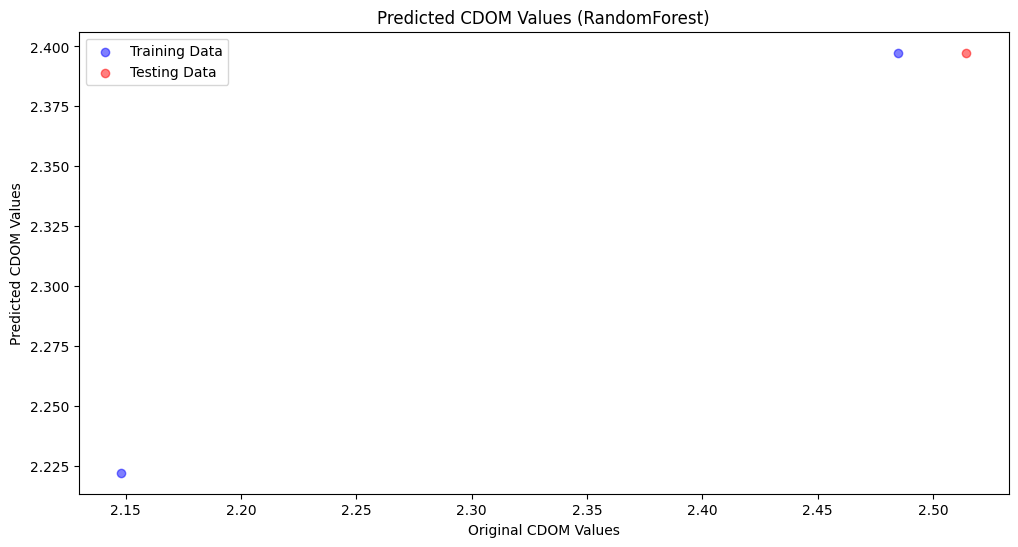

In [24]:
import matplotlib.pyplot as plt

# Train the RandomForest model
random_forest_model = models['RandomForest']
random_forest_model.fit(X_train, y_train)

# Predict CDOM values for the training data
y_train_pred_rf = random_forest_model.predict(X_train)

# Predict CDOM values for the testing data
y_test_pred_rf = random_forest_model.predict(X_test)

# Create DataFrames for the training and testing data with all bands and the predicted values
data_train_rf = X_train.copy()
data_train_rf['original_CDOM'] = y_train
data_train_rf['predicted_CDOM'] = y_train_pred_rf

data_test_rf = X_test.copy()
data_test_rf['original_CDOM'] = y_test
data_test_rf['predicted_CDOM'] = y_test_pred_rf

# Plotting Predicted Training and Testing data (RandomForest) on the same plot
plt.figure(figsize=(12, 6))
plt.scatter(data_train_rf['original_CDOM'], data_train_rf['predicted_CDOM'], label='Training Data', color='blue', alpha=0.5)
plt.scatter(data_test_rf['original_CDOM'], data_test_rf['predicted_CDOM'], label='Testing Data', color='red', alpha=0.5)
plt.xlabel('Original CDOM Values')
plt.ylabel('Predicted CDOM Values')
plt.title('Predicted CDOM Values (RandomForest)')
plt.legend()
plt.show()


# Plot - All Models - original_CDOM vs predicted_CDOM

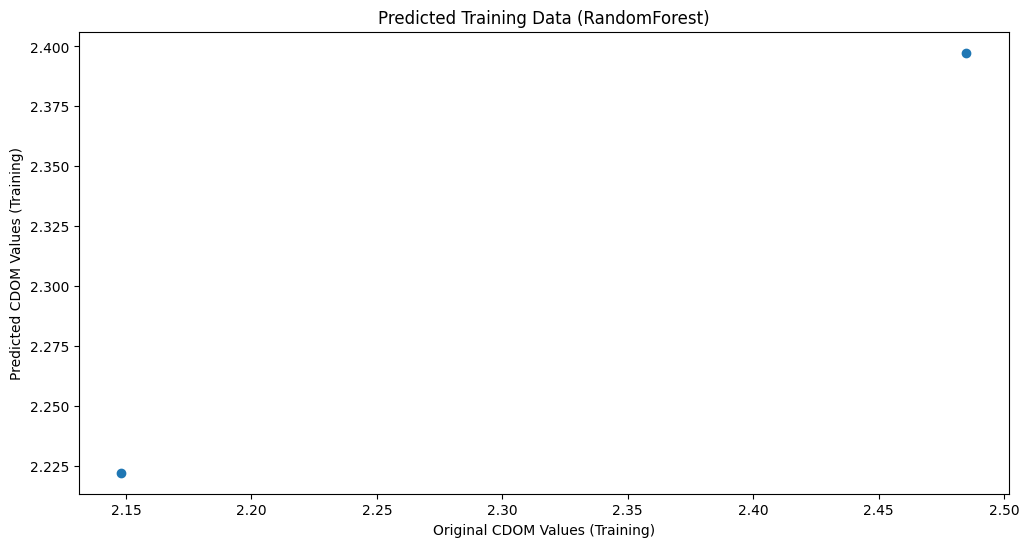

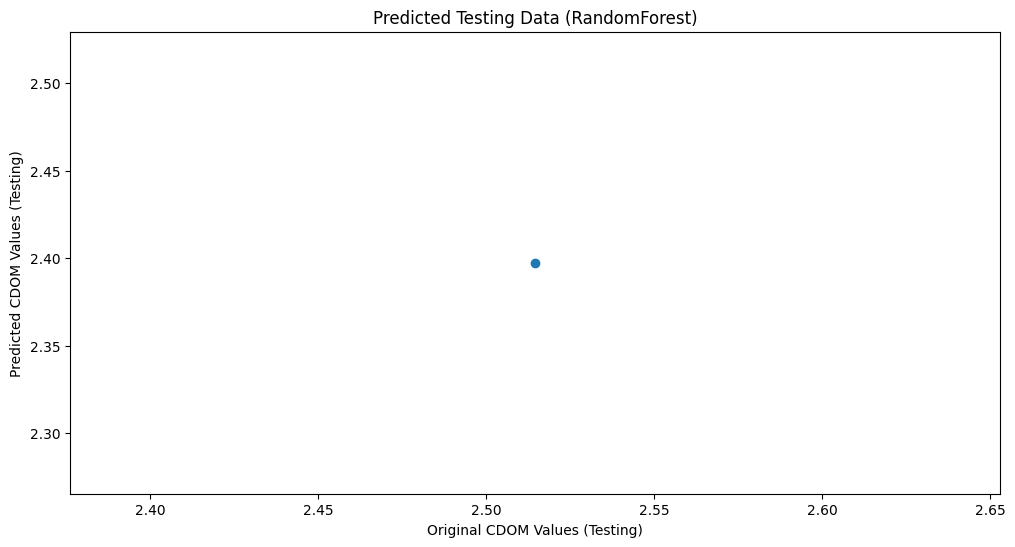

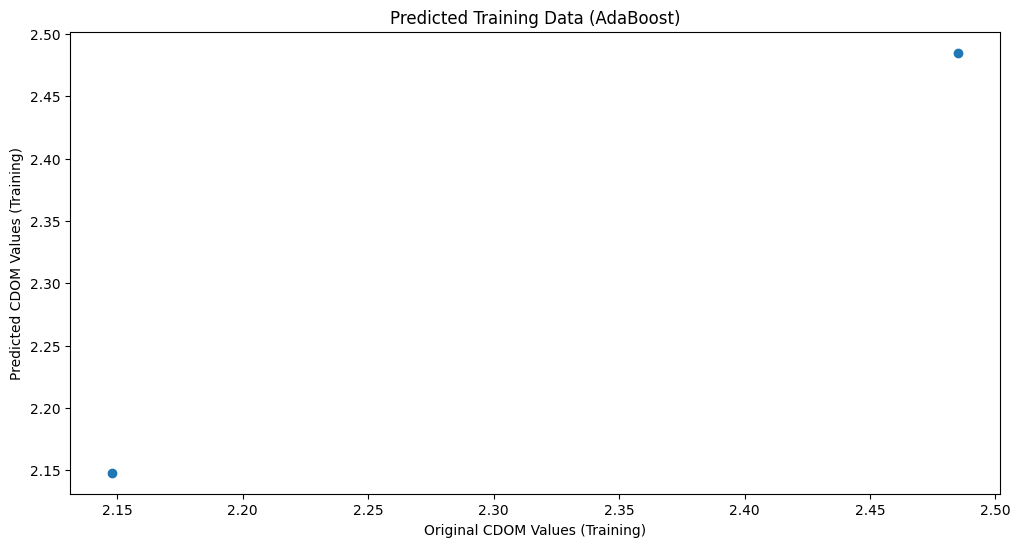

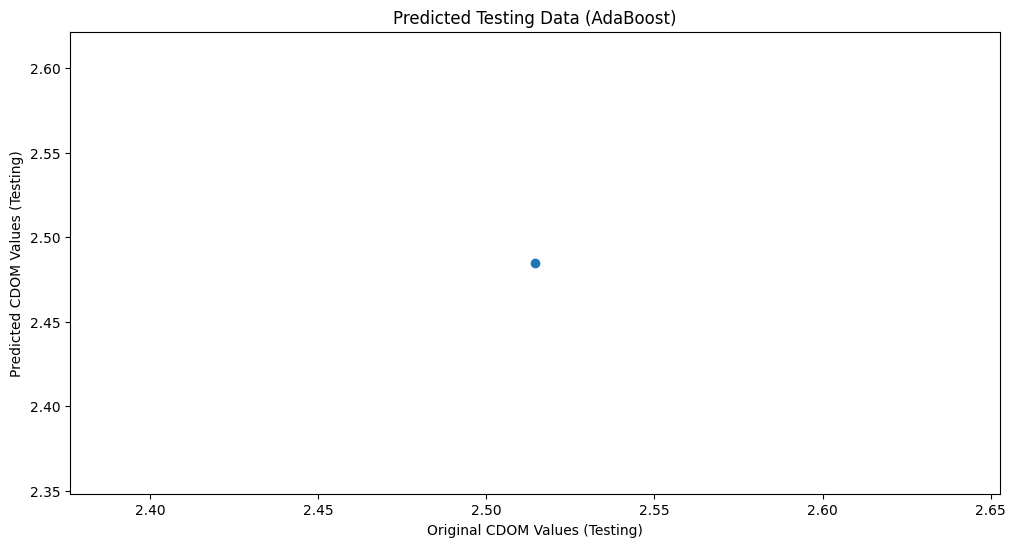

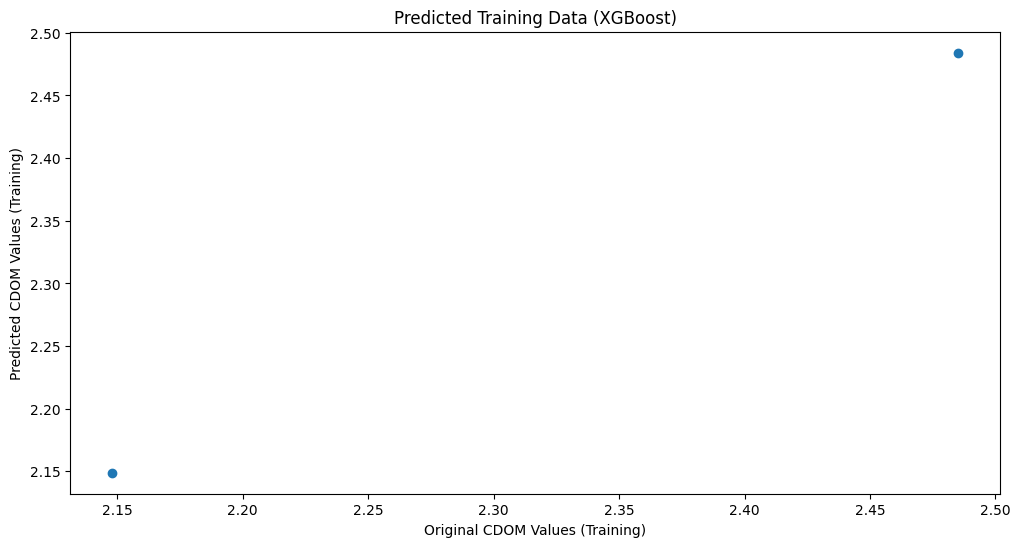

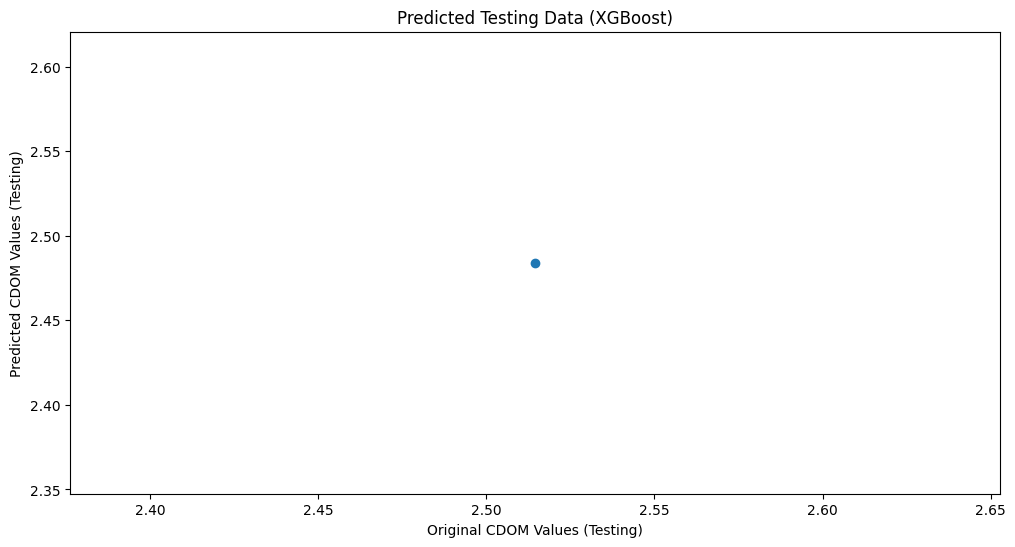

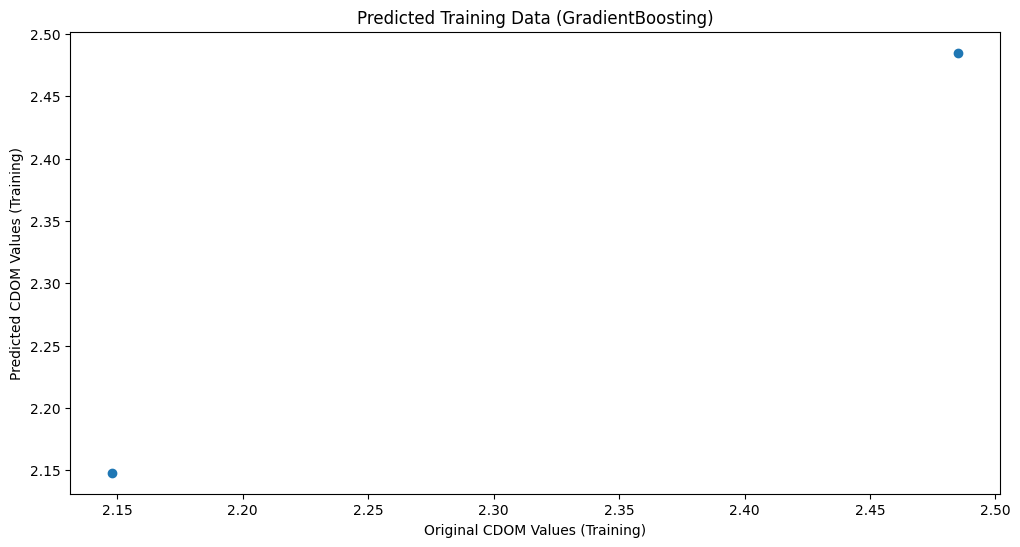

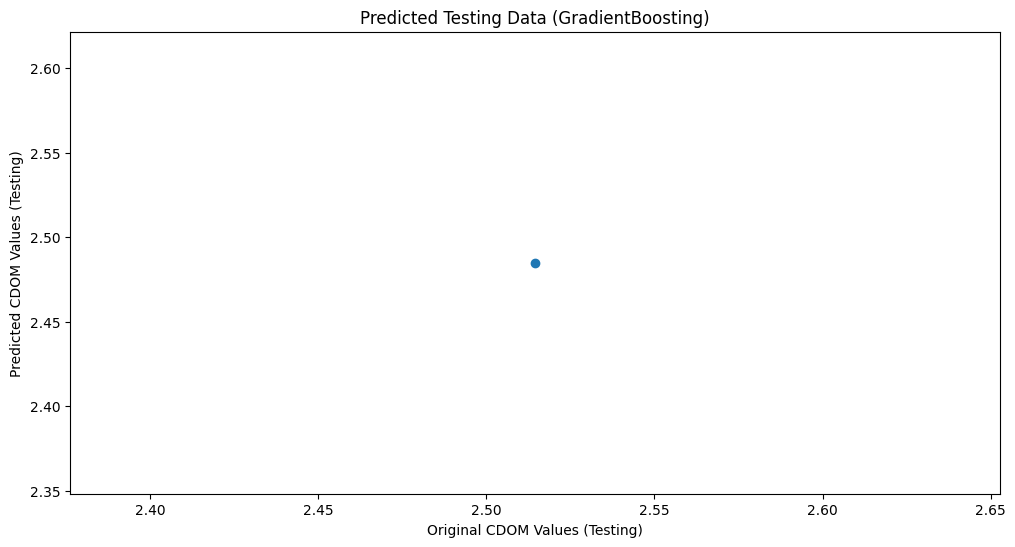

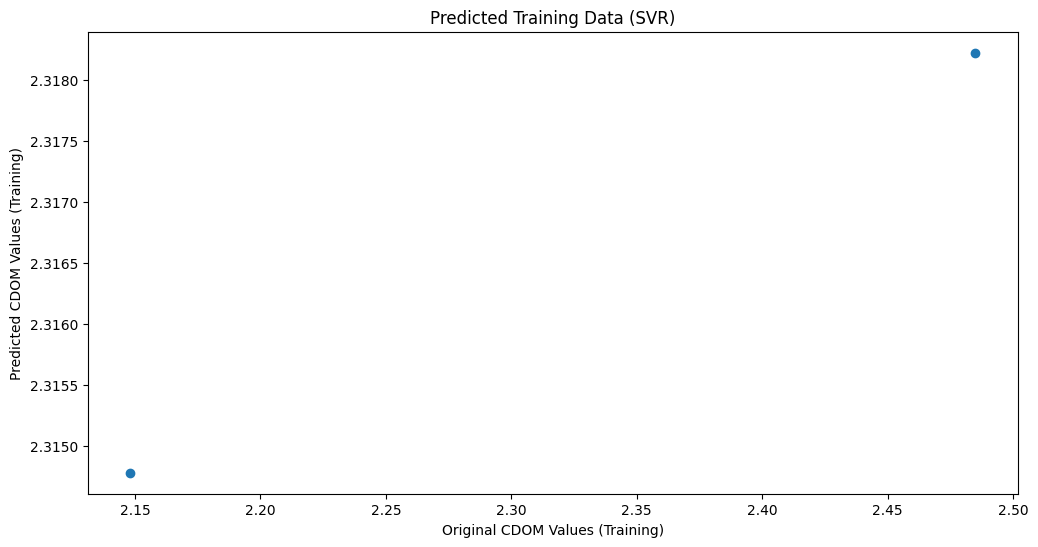

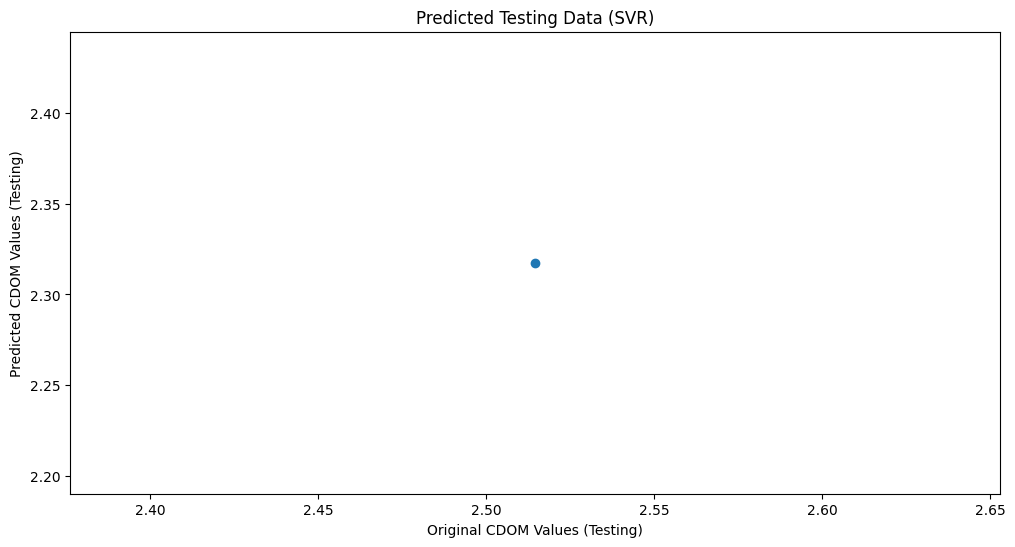

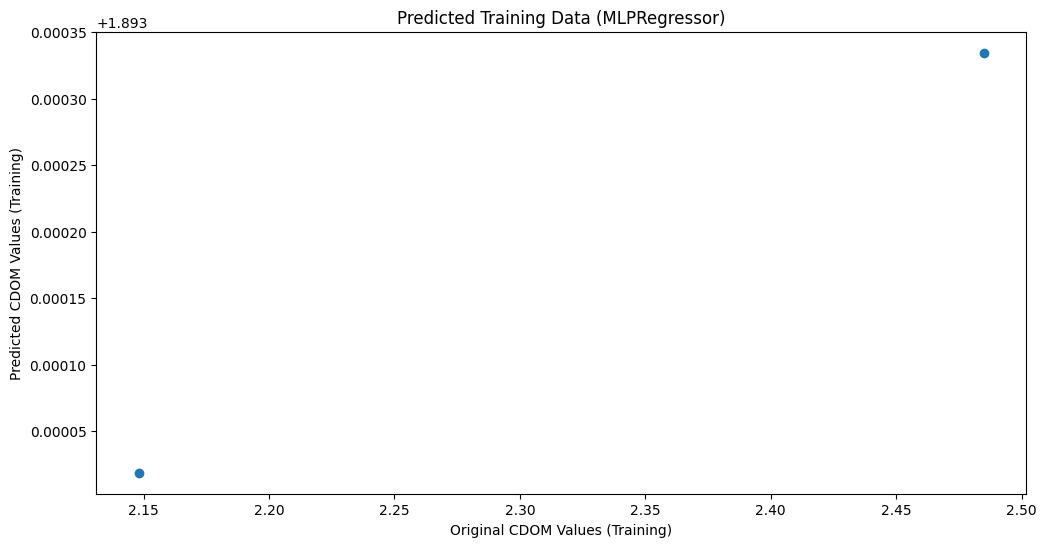

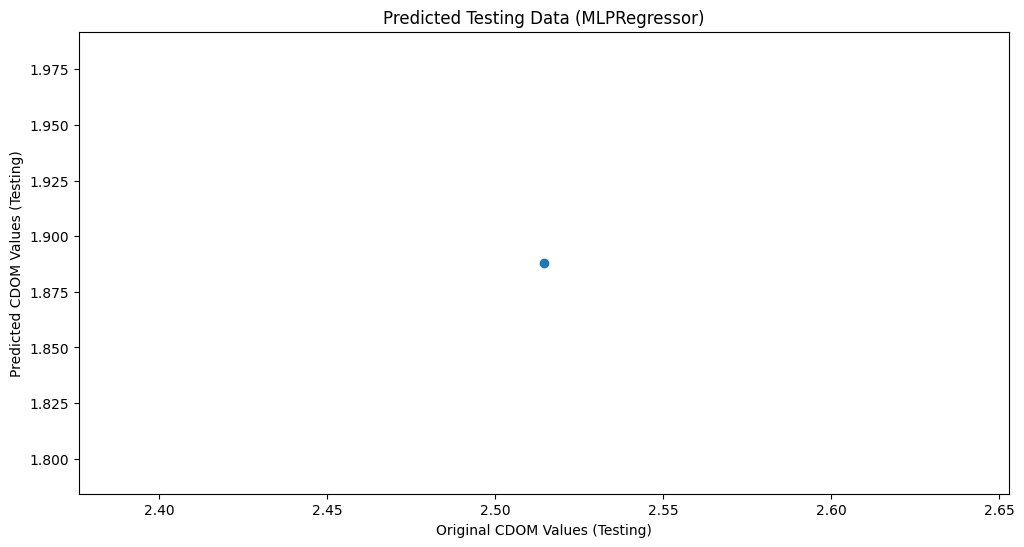

In [25]:
import matplotlib.pyplot as plt

# Iterate through the trained models and plot predicted data
for model_name, model in models.items():
    # Predict CDOM values for the training data
    y_train_pred = model.predict(X_train)
    
    # Predict CDOM values for the testing data
    y_test_pred = model.predict(X_test)

    # Create DataFrames for the training and testing data with all bands and the predicted values
    data_train = X_train.copy()
    data_train['original_CDOM'] = y_train
    data_train['predicted_CDOM'] = y_train_pred

    data_test = X_test.copy()
    data_test['original_CDOM'] = y_test
    data_test['predicted_CDOM'] = y_test_pred

    # Plotting Predicted Training data
    plt.figure(figsize=(12, 6))
    plt.scatter(data_train['original_CDOM'], data_train['predicted_CDOM'])
    plt.xlabel('Original CDOM Values (Training)')
    plt.ylabel('Predicted CDOM Values (Training)')
    plt.title(f'Predicted Training Data ({model_name})')
    plt.show()

    # Plotting Predicted Testing data
    plt.figure(figsize=(12, 6))
    plt.scatter(data_test['original_CDOM'], data_test['predicted_CDOM'])
    plt.xlabel('Original CDOM Values (Testing)')
    plt.ylabel('Predicted CDOM Values (Testing)')
    plt.title(f'Predicted Testing Data ({model_name})')
    plt.show()


In [26]:
merged_data_all

,AWI Site ID,AWI Waterbody ID,Waterbody Name,Sample Location,Latitude,Longitude,Strata,Parameter,Reported Value,Units,...,NIR,Red,RedEdge1,RedEdge2,RedEdge4,SWIR1,LAKE_LABEL,year,month,day
682,AWI00057.1,AWI00057,Raquette Lake,Deep Hole,43.852318,-74.651214,Surface,CDOM,10.3510,µg/L QSE,...,0.854111,0.895399,0.916096,0.906611,0.875243,0.229952,130.0,2022,3,16
1055,AWI00257.1,AWI00257,Rush Pond,Deep Hole,43.349455,-73.703314,Surface,CDOM,5.2685,µg/L QSE,...,0.826794,0.906550,0.898655,0.880106,0.856405,0.286981,80.0,2022,9,27
1056,AWI00053.4,AWI00053,Paradox Lake,Lower,43.882729,-73.709252,Surface,CDOM,3.7905,µg/L QSE,...,0.914166,0.995840,0.984061,0.971585,0.943120,0.304959,125.0,2022,9,27
1057,AWI00026.1,AWI00026,Mirror Lake,Deep Hole,44.289140,-73.982184,Surface,CDOM,2.5145,µg/L QSE,...,0.916679,0.991012,0.985535,0.964789,0.942326,0.250581,123.0,2022,9,27
1058,AWI00020.1,AWI00020,Moody Pond,Deep Hole,44.329084,-74.118116,Surface,CDOM,5.1345,µg/L QSE,...,0.884378,0.962070,0.955198,0.937789,0.905400,0.224569,68.0,2022,9,27
1059,AWI00258.1,AWI00258,Slang Pond,Deep Hole,44.363774,-74.379685,Surface,CDOM,5.3545,µg/L QSE,...,0.897023,0.973130,0.971860,0.955290,0.926287,0.220653,81.0,2022,9,28
1060,AWI00255.1,AWI00255,Rat Pond,Deep Hole,44.354554,-74.312428,Surface,CDOM,8.5210,µg/L QSE,...,0.923679,0.996197,0.994714,0.974485,0.950775,0.231102,78.0,2022,9,28
1061,AWI00259.1,AWI00259,Turtle Pond,Deep Hole,44.360139,-74.361257,Surface,CDOM,3.1935,µg/L QSE,...,0.864413,0.955500,0.945989,0.925980,0.898762,0.212534,144.0,2022,9,28
1062,AWI00134.1,AWI00134,Upper Ausable Lake,Deep Hole,44.077233,-73.873713,Surface,CDOM,7.9890,µg/L QSE,...,0.731142,0.807796,0.797440,0.782680,0.757682,0.248604,146.0,2022,9,28
1063,AWI00245.1,AWI00245,Little Rainbow Pond,Deep Hole,44.359345,-74.325464,Surface,CDOM,11.9460,µg/L QSE,...,0.882396,0.951788,0.955169,0.937529,0.909374,0.223401,58.0,2022,9,28


# 3 Day Window

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler



df_all_lakes['DATE_SMP'] = pd.to_datetime(df_all_lakes['DATE_SMP'])
filtered_df['DATE_SMP'] = pd.to_datetime(filtered_df['DATE_SMP'])

filtered_df.sort_values('DATE_SMP', inplace=True)
df_all_lakes.sort_values('DATE_SMP', inplace=True)



# Drop the 'nir' band column
# df_all_lakes.drop(columns='nir', inplace=True)

# Display the DataFrame containing reflectance values for all lakes with the new columns
# print(df_all_lakes)


merged_data_all = pd.merge_asof(filtered_df, df_all_lakes, on='DATE_SMP', by='Waterbody Name', tolerance=pd.Timedelta(days=3))

# Drop rows where the 'Reflectance' column is null
merged_data_all = merged_data_all.dropna(subset=['Blue'])

merged_data_all = merged_data_all.dropna(subset=['Reported Value'])




# Display the updated DataFrame
# print(merged_data)
merged_data_all


# Preprocessing the 'DATE_SMP' column to extract useful features
merged_data_all['DATE_SMP'] = pd.to_datetime(merged_data_all['DATE_SMP'])  # Convert to datetime if not already done
merged_data_all['year'] = merged_data_all['DATE_SMP'].dt.year
merged_data_all['month'] = merged_data_all['DATE_SMP'].dt.month
merged_data_all['day'] = merged_data_all['DATE_SMP'].dt.day

# Drop the original 'DATE_SMP' column as it is no longer needed
merged_data_all = merged_data_all.drop(columns=['DATE_SMP'])

merged_data_all['LAKE_DEPTH (m)'] = pd.to_numeric(merged_data_all['LAKE_DEPTH (m)'], errors='coerce')
# merged_data_all['SURFACE_AREA (ha)'] = pd.to_numeric(merged_data_all['SURFACE_AREA (ha)'], errors='coerce')

merged_data_all = merged_data_all.dropna(subset=['Aerosols', 'Blue', 'Green', 'Red', 'RedEdge1','RedEdge2','RedEdge4','NIR','SWIR1','LAKE_DEPTH (m)', 'Reported Value'])


# Preparing the training data for 'Arbutus Pond' lake_label
X = merged_data_all[['Aerosols', 'Blue', 'Green', 'Red', 'RedEdge1','RedEdge2','RedEdge4','NIR','SWIR1','LAKE_DEPTH (m)']]  # Features
y = merged_data_all['Reported Value']  # Target variable

# Group the data by 'LAKE_LABEL'
grouped_data = merged_data_all.groupby('LAKE_LABEL')

min_samples = 2  # Adjust this value based on your dataset and requirements

# Initialize lists to store the training and testing data for all lakes
X_train_all, X_test_all, y_train_all, y_test_all = [], [], [], []

# Loop through each lake group and split data into training and testing sets
for _, lake_group in grouped_data:
    X_lake = lake_group[['Aerosols', 'Blue', 'Green', 'Red', 'RedEdge1','RedEdge2','RedEdge4','NIR','SWIR1','LAKE_DEPTH (m)']]
    y_lake = lake_group['Reported Value']

    if len(lake_group) >= min_samples:
        # Split data into training and testing sets for the current lake
        X_train_lake, X_test_lake, y_train_lake, y_test_lake = train_test_split(X_lake, y_lake, test_size=0.3, random_state=42)

        # Append the data for the current lake to the corresponding lists
        X_train_all.append(X_train_lake)
        X_test_all.append(X_test_lake)
        y_train_all.append(y_train_lake)
        y_test_all.append(y_test_lake)

# Concatenate the training and testing data for all lakes
X_train = pd.concat(X_train_all)
X_test = pd.concat(X_test_all)
y_train = pd.concat(y_train_all)
y_test = pd.concat(y_test_all)

print('**************Data Points Used***************************')
num_rows, num_cols = X.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# Initialize models
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(),
    'MLPRegressor': MLPRegressor(random_state=42)
}

# Initialize lists to store model evaluation results
model_names, r2_scores, mses, rmses, maes = [], [], [], [], []

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict CDOM values for the testing data
    y_pred= model.predict(X_test)
    
    

    # Create DataFrames for the training and testing data with all bands and the predicted values
    data_train = X_train.copy()
    data_train['original_CDOM'] = y_train
    data_train['predicted_CDOM'] = model.predict(X_train)

    data_test = X_test.copy()
    data_test['original_CDOM'] = y_test
    data_test['predicted_CDOM'] = y_pred

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)

    # Append the results to the lists
    model_names.append(model_name)
    r2_scores.append(r2)
    mses.append(mse)
    rmses.append(rmse)
    maes.append(mae)

    # Display the predicted CDOM values for the training and testing data
    print(f'*************Predicted Training data ({model_name})***************')
    print(data_train)

    print(f'*************Predicted Testing data ({model_name})***************')
    print(data_test)

# Create a dataframe to store the results
evaluation_df_all = pd.DataFrame({
    'Model': model_names,
    'R^2': r2_scores,
    'MSE': mses,
    'RMSE': rmses,
    'MAE': maes
})

# Print the dataframe
print('# WITH LAKE DEPTH AS FEATURES 3 day window/n')
evaluation_df_all

**************Data Points Used***************************
Number of rows: 25
Number of columns: 10
*************Predicted Training data (RandomForest)***************
      Aerosols      Blue     Green       Red  RedEdge1  RedEdge2  RedEdge4  \
1074  1.074199  1.102473  1.099468  1.058908  1.051730  1.026405  0.996879   
1068  0.999830  1.011149  1.009565  0.971127  0.970420  0.944979  0.910176   
1073  1.074199  1.102473  1.099468  1.058908  1.051730  1.026405  0.996879   
1069  0.999830  1.011149  1.009565  0.971127  0.970420  0.944979  0.910176   
1077  1.061885  1.083888  1.065688  1.050570  1.052456  1.033057  1.006767   
1057  0.987009  1.007568  1.008264  0.991012  0.985535  0.964789  0.942326   
1070  1.061548  1.073716  1.076713  1.038494  1.035301  1.011976  0.979373   
1067  0.868997  0.856222  0.831401  0.781518  0.773822  0.756441  0.724699   

           NIR     SWIR1  LAKE_DEPTH (m)  original_CDOM  predicted_CDOM  
1074  0.956798  0.217078            26.0         6.8780  

,Model,R^2,MSE,RMSE,MAE
0,RandomForest,0.985078,0.047463,0.217861,0.187392
1,AdaBoost,0.965790,0.108814,0.329870,0.268125
2,XGBoost,0.991183,0.028046,0.167469,0.146831
3,GradientBoosting,0.965503,0.109728,0.331253,0.269987
4,SVR,0.497538,1.598239,1.264215,1.257824
5,MLPRegressor,0.943847,0.178612,0.422625,0.393285


In [28]:
# Assuming you have already trained a Random Forest model
random_forest_model = models['XGBoost']
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame to display the feature importances with their corresponding column names
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
print("XGBoost Feature Importances:")
feature_importance_df

XGBoost Feature Importances:


,Feature,Importance
0,Aerosols,0.006836
1,Blue,0.000000
2,Green,0.000883
3,Red,0.000000
4,RedEdge1,0.000000
5,RedEdge2,0.000000
6,RedEdge4,0.000000
7,NIR,0.000000
8,SWIR1,0.018507
9,LAKE_DEPTH (m),0.973774


# Increase Band Importance

In [29]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# import numpy as np
# from sklearn.preprocessing import StandardScaler

# # Assuming merged_data_all contains your preprocessed data

# # Preparing the training data for 'Arbutus Pond' lake_label
# X = merged_data_all[['Aerosols', 'Blue', 'Green', 'Red', 'RedEdge1', 'RedEdge2', 'RedEdge4', 'NIR', 'SWIR1', 'LAKE_DEPTH (m)']]  # Features
# y = merged_data_all['Reported Value']  # Target variable

# # Group the data by 'LAKE_LABEL'
# grouped_data = merged_data_all.groupby('LAKE_LABEL')

# min_samples = 2  # Adjust this value based on your dataset and requirements

# # Initialize lists to store the training and testing data for all lakes
# X_train_all, X_test_all, y_train_all, y_test_all = [], [], [], []

# # Loop through each lake group and split data into training and testing sets
# for _, lake_group in grouped_data:
#     X_lake = lake_group[['Aerosols', 'Blue', 'Green', 'Red', 'RedEdge1', 'RedEdge2', 'RedEdge4', 'NIR', 'SWIR1', 'LAKE_DEPTH (m)']]
#     y_lake = lake_group['Reported Value']

#     if len(lake_group) >= min_samples:
#         # Split data into training and testing sets for the current lake
#         X_train_lake, X_test_lake, y_train_lake, y_test_lake = train_test_split(X_lake, y_lake, test_size=0.3, random_state=42)

#         # Increase the importance of the 'Red' band by taking the logarithm
#         X_train_lake['Red'] = np.log(X_train_lake['Red'])
#         X_test_lake['Red'] = np.log(X_test_lake['Red'])

#         # Append the data for the current lake to the corresponding lists
#         X_train_all.append(X_train_lake)
#         X_test_all.append(X_test_lake)
#         y_train_all.append(y_train_lake)
#         y_test_all.append(y_test_lake)

# # Concatenate the training and testing data for all lakes
# X_train = pd.concat(X_train_all)
# X_test = pd.concat(X_test_all)
# y_train = pd.concat(y_train_all)
# y_test = pd.concat(y_test_all)

# print('**************Data Points Used***************************')
# num_rows, num_cols = X.shape
# print("Number of rows:", num_rows)
# print("Number of columns:", num_cols)

# # Initialize models
# models = {
#     'RandomForest': RandomForestRegressor(random_state=42),
#     'AdaBoost': AdaBoostRegressor(random_state=42),
#     'XGBoost': XGBRegressor(random_state=42),
#     'GradientBoosting': GradientBoostingRegressor(random_state=42),
#     'SVR': SVR(),
#     'MLPRegressor': MLPRegressor(random_state=42)
# }

# # Initialize lists to store model evaluation results
# model_names, r2_scores, mses, rmses, maes = [], [], [], [], []

# # Train and evaluate each model
# for model_name, model in models.items():
#     # Fit the model
#     model.fit(X_train, y_train)

#     # Predict CDOM values for the testing data
#     y_pred= model.predict(X_test)
    
    

#     # Create DataFrames for the training and testing data with all bands and the predicted values
#     data_train = X_train.copy()
#     data_train['original_CDOM'] = y_train
#     data_train['predicted_CDOM'] = model.predict(X_train)

#     data_test = X_test.copy()
#     data_test['original_CDOM'] = y_test
#     data_test['predicted_CDOM'] = y_pred

#     # Calculate evaluation metrics
#     r2 = r2_score(y_test, y_pred)
#     mse = mean_squared_error(y_test, y_pred)
#     rmse = mean_squared_error(y_test, y_pred, squared=False)
#     mae = mean_absolute_error(y_test, y_pred)

#     # Append the results to the lists
#     model_names.append(model_name)
#     r2_scores.append(r2)
#     mses.append(mse)
#     rmses.append(rmse)
#     maes.append(mae)

#     # Display the predicted CDOM values for the training and testing data
#     print(f'*************Predicted Training data ({model_name})***************')
#     print(data_train)

#     print(f'*************Predicted Testing data ({model_name})***************')
#     print(data_test)

# # Create a dataframe to store the results
# evaluation_df_all = pd.DataFrame({
#     'Model': model_names,
#     'R^2': r2_scores,
#     'MSE': mses,
#     'RMSE': rmses,
#     'MAE': maes
# })

# # Print the dataframe
# print('# WITH LAKE DEPTH AS FEATURES 3 day window/n')
# evaluation_df_all

# Plots for the R^2, MSE, RMSE, and MAE 

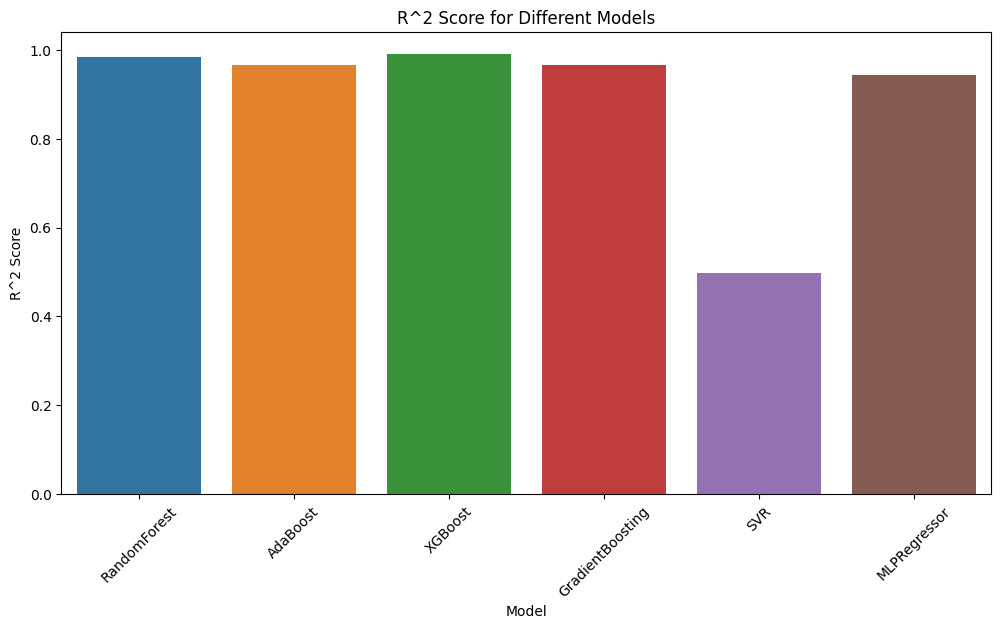

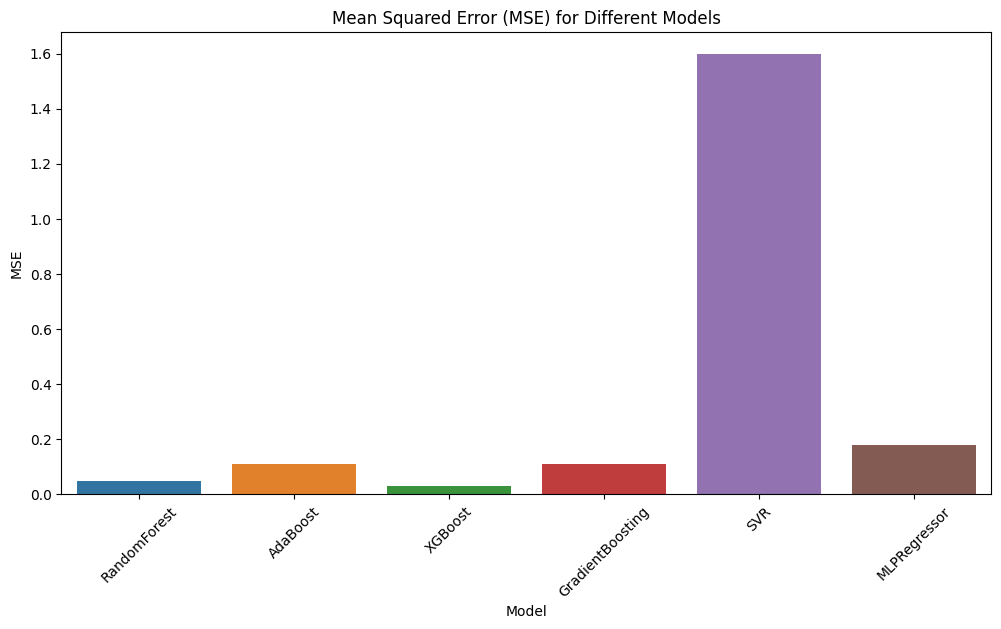

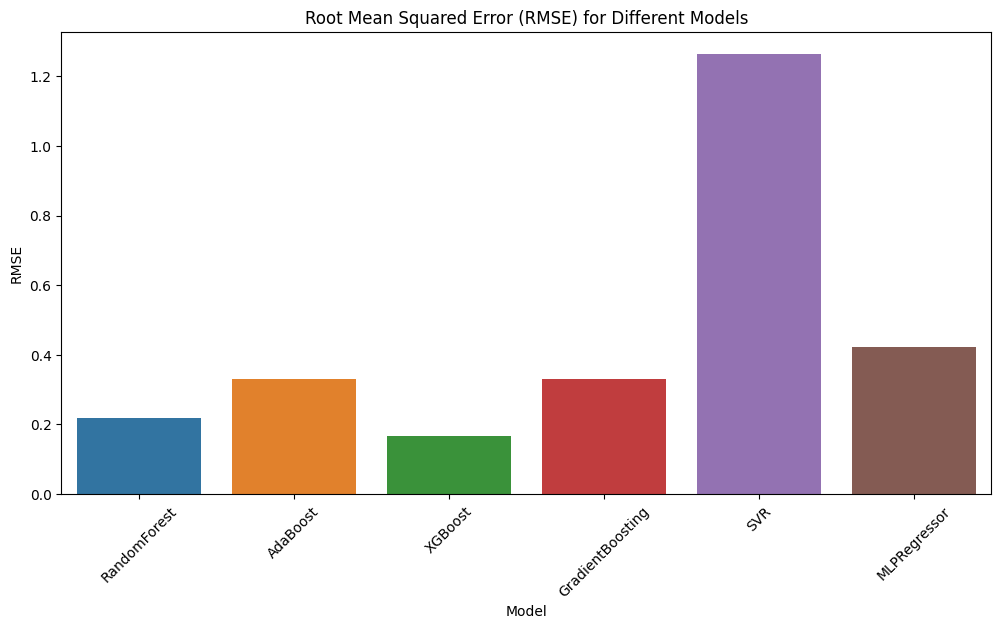

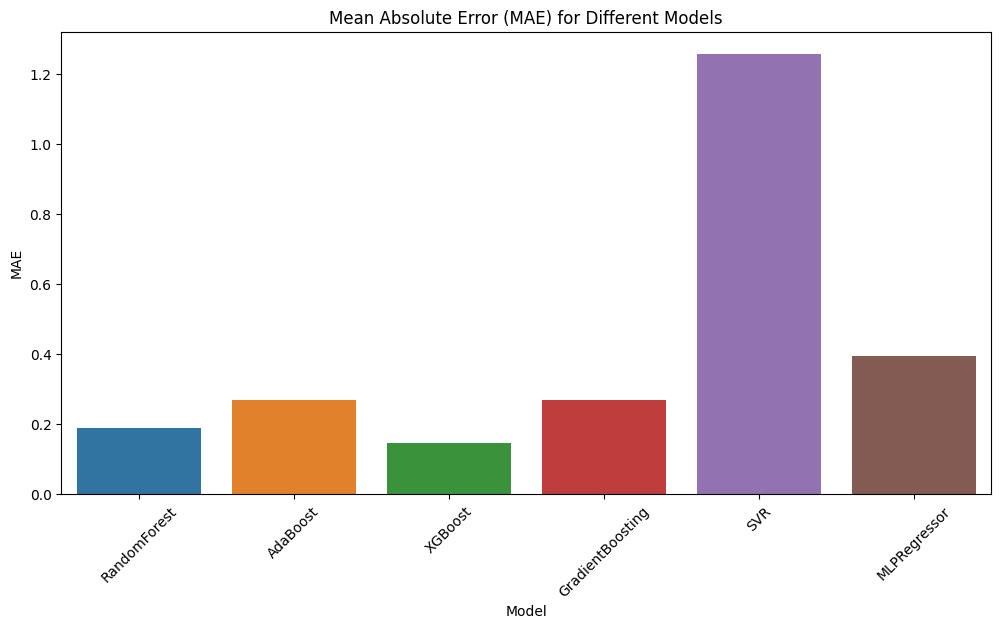

In [30]:
import seaborn as sns

# Plotting evaluation metrics using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='R^2', data=evaluation_df_all)
plt.title('R^2 Score for Different Models')
plt.ylabel('R^2 Score')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='MSE', data=evaluation_df_all)
plt.title('Mean Squared Error (MSE) for Different Models')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='RMSE', data=evaluation_df_all)
plt.title('Root Mean Squared Error (RMSE) for Different Models')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='MAE', data=evaluation_df_all)
plt.title('Mean Absolute Error (MAE) for Different Models')
plt.ylabel('MAE')
plt.xticks(rotation=45)
plt.show()

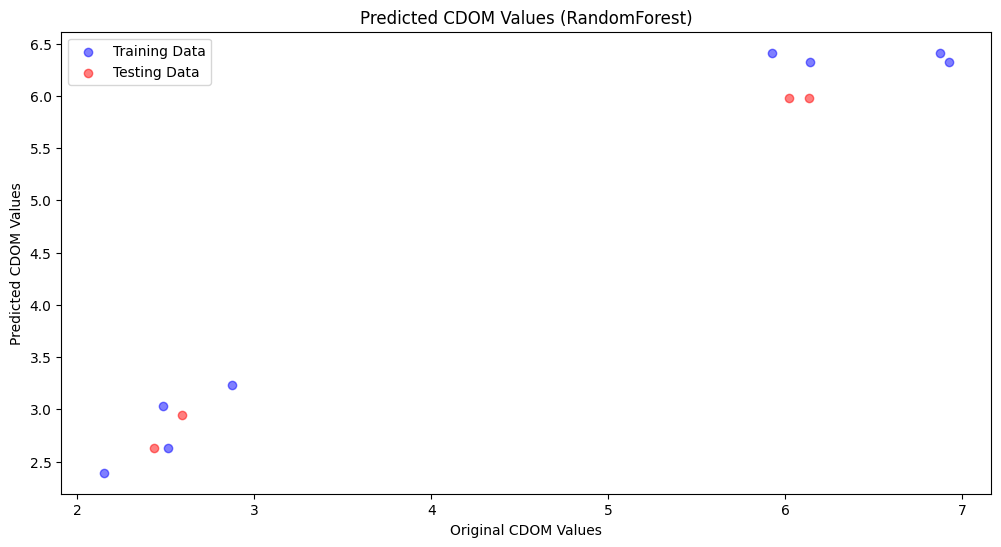

In [31]:
import matplotlib.pyplot as plt

# Train the RandomForest model
random_forest_model = models['RandomForest']
random_forest_model.fit(X_train, y_train)

# Predict CDOM values for the training data
y_train_pred_rf = random_forest_model.predict(X_train)

# Predict CDOM values for the testing data
y_test_pred_rf = random_forest_model.predict(X_test)

# Create DataFrames for the training and testing data with all bands and the predicted values
data_train_rf = X_train.copy()
data_train_rf['original_CDOM'] = y_train
data_train_rf['predicted_CDOM'] = y_train_pred_rf

data_test_rf = X_test.copy()
data_test_rf['original_CDOM'] = y_test
data_test_rf['predicted_CDOM'] = y_test_pred_rf

# Plotting Predicted Training and Testing data (RandomForest) on the same plot
plt.figure(figsize=(12, 6))
plt.scatter(data_train_rf['original_CDOM'], data_train_rf['predicted_CDOM'], label='Training Data', color='blue', alpha=0.5)
plt.scatter(data_test_rf['original_CDOM'], data_test_rf['predicted_CDOM'], label='Testing Data', color='red', alpha=0.5)
plt.xlabel('Original CDOM Values')
plt.ylabel('Predicted CDOM Values')
plt.title('Predicted CDOM Values (RandomForest)')
plt.legend()
plt.show()


# 7-Day Window

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler



df_all_lakes['DATE_SMP'] = pd.to_datetime(df_all_lakes['DATE_SMP'])
filtered_df['DATE_SMP'] = pd.to_datetime(filtered_df['DATE_SMP'])

filtered_df.sort_values('DATE_SMP', inplace=True)
df_all_lakes.sort_values('DATE_SMP', inplace=True)



# Drop the 'nir' band column
# df_all_lakes.drop(columns='nir', inplace=True)

# Display the DataFrame containing reflectance values for all lakes with the new columns
# print(df_all_lakes)


merged_data_all = pd.merge_asof(filtered_df, df_all_lakes, on='DATE_SMP', by='Waterbody Name', tolerance=pd.Timedelta(days=7))

# Drop rows where the 'Reflectance' column is null
merged_data_all = merged_data_all.dropna(subset=['Blue'])

merged_data_all = merged_data_all.dropna(subset=['Reported Value'])




# Display the updated DataFrame
# print(merged_data)
merged_data_all


# Preprocessing the 'DATE_SMP' column to extract useful features
merged_data_all['DATE_SMP'] = pd.to_datetime(merged_data_all['DATE_SMP'])  # Convert to datetime if not already done
merged_data_all['year'] = merged_data_all['DATE_SMP'].dt.year
merged_data_all['month'] = merged_data_all['DATE_SMP'].dt.month
merged_data_all['day'] = merged_data_all['DATE_SMP'].dt.day

# Drop the original 'DATE_SMP' column as it is no longer needed
merged_data_all = merged_data_all.drop(columns=['DATE_SMP'])

merged_data_all['LAKE_DEPTH (m)'] = pd.to_numeric(merged_data_all['LAKE_DEPTH (m)'], errors='coerce')
# merged_data_all['SURFACE_AREA (ha)'] = pd.to_numeric(merged_data_all['SURFACE_AREA (ha)'], errors='coerce')

merged_data_all = merged_data_all.dropna(subset=['Aerosols', 'Blue', 'Green', 'Red', 'RedEdge1','RedEdge2','RedEdge4','NIR','SWIR1','LAKE_DEPTH (m)', 'Reported Value'])


# Preparing the training data for 'Arbutus Pond' lake_label
X = merged_data_all[['Aerosols', 'Blue', 'Green', 'Red', 'RedEdge1','RedEdge2','RedEdge4','NIR','SWIR1', 'LAKE_DEPTH (m)']]  # Features
y = merged_data_all['Reported Value']  # Target variable

# Group the data by 'LAKE_LABEL'
grouped_data = merged_data_all.groupby('LAKE_LABEL')

min_samples = 2  # Adjust this value based on your dataset and requirements

# Initialize lists to store the training and testing data for all lakes
X_train_all, X_test_all, y_train_all, y_test_all = [], [], [], []

# Loop through each lake group and split data into training and testing sets
for _, lake_group in grouped_data:
    X_lake = lake_group[['Aerosols', 'Blue', 'Green', 'Red', 'RedEdge1','RedEdge2','RedEdge4','NIR','SWIR1', 'LAKE_DEPTH (m)']]
    y_lake = lake_group['Reported Value']

    if len(lake_group) >= min_samples:
        # Split data into training and testing sets for the current lake
        X_train_lake, X_test_lake, y_train_lake, y_test_lake = train_test_split(X_lake, y_lake, test_size=0.3, random_state=42)

        # Append the data for the current lake to the corresponding lists
        X_train_all.append(X_train_lake)
        X_test_all.append(X_test_lake)
        y_train_all.append(y_train_lake)
        y_test_all.append(y_test_lake)

# Concatenate the training and testing data for all lakes
X_train = pd.concat(X_train_all)
X_test = pd.concat(X_test_all)
y_train = pd.concat(y_train_all)
y_test = pd.concat(y_test_all)

print('**************Data Points Used***************************')
num_rows, num_cols = X.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# Initialize models
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(),
    'MLPRegressor': MLPRegressor(random_state=42)
}

# Initialize lists to store model evaluation results
model_names, r2_scores, mses, rmses, maes = [], [], [], [], []

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict CDOM values for the testing data
    y_pred= model.predict(X_test)
    
    

    # Create DataFrames for the training and testing data with all bands and the predicted values
    data_train = X_train.copy()
    data_train['original_CDOM'] = y_train
    data_train['predicted_CDOM'] = model.predict(X_train)

    data_test = X_test.copy()
    data_test['original_CDOM'] = y_test
    data_test['predicted_CDOM'] = y_pred

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)

    # Append the results to the lists
    model_names.append(model_name)
    r2_scores.append(r2)
    mses.append(mse)
    rmses.append(rmse)
    maes.append(mae)

    # Display the predicted CDOM values for the training and testing data
    print(f'*************Predicted Training data ({model_name})***************')
    print(data_train)

    print(f'*************Predicted Testing data ({model_name})***************')
    print(data_test)

# Create a dataframe to store the results
evaluation_df_all = pd.DataFrame({
    'Model': model_names,
    'R^2': r2_scores,
    'MSE': mses,
    'RMSE': rmses,
    'MAE': maes
})

# Print the dataframe
print('# WITH LAKE Depth AS FEATURES 7 day window/n')
evaluation_df_all

**************Data Points Used***************************
Number of rows: 33
Number of columns: 10
*************Predicted Training data (RandomForest)***************
      Aerosols      Blue     Green       Red  RedEdge1  RedEdge2  RedEdge4  \
1074  1.074199  1.102473  1.099468  1.058908  1.051730  1.026405  0.996879   
1068  0.999830  1.011149  1.009565  0.971127  0.970420  0.944979  0.910176   
1073  1.074199  1.102473  1.099468  1.058908  1.051730  1.026405  0.996879   
1069  0.999830  1.011149  1.009565  0.971127  0.970420  0.944979  0.910176   
680   1.059042  1.077201  1.050265  1.029301  1.033643  1.010575  0.967079   
679   1.067736  1.084346  1.055533  1.030360  1.039942  1.014021  0.962164   
1072  1.060627  1.069186  1.067474  1.026607  1.020989  1.001725  0.960656   
683   0.969248  0.974756  0.908554  0.928186  0.947015  0.930202  0.904665   
1070  1.061548  1.073716  1.076713  1.038494  1.035301  1.011976  0.979373   
681   0.999712  1.012468  0.965759  0.969144  0.987285

,Model,R^2,MSE,RMSE,MAE
0,RandomForest,0.594125,1.856037,1.362365,0.928699
1,AdaBoost,0.128754,3.984148,1.996033,1.174405
2,XGBoost,0.048622,4.350584,2.085805,1.426345
3,GradientBoosting,0.892960,0.489486,0.699632,0.586224
4,SVR,-0.247007,5.702475,2.387986,1.682708
5,MLPRegressor,-0.232154,5.634556,2.373722,1.283763


In [33]:
# Assuming you have already trained a Random Forest model
random_forest_model = models['GradientBoosting']
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame to display the feature importances with their corresponding column names
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
print("GradientBoosting Feature Importances:")
feature_importance_df

GradientBoosting Feature Importances:


,Feature,Importance
0,Aerosols,0.000161
1,Blue,0.010201
2,Green,0.000673
3,Red,0.000648
4,RedEdge1,0.000527
5,RedEdge2,0.001590
6,RedEdge4,0.000308
7,NIR,0.000106
8,SWIR1,0.006182
9,LAKE_DEPTH (m),0.979604


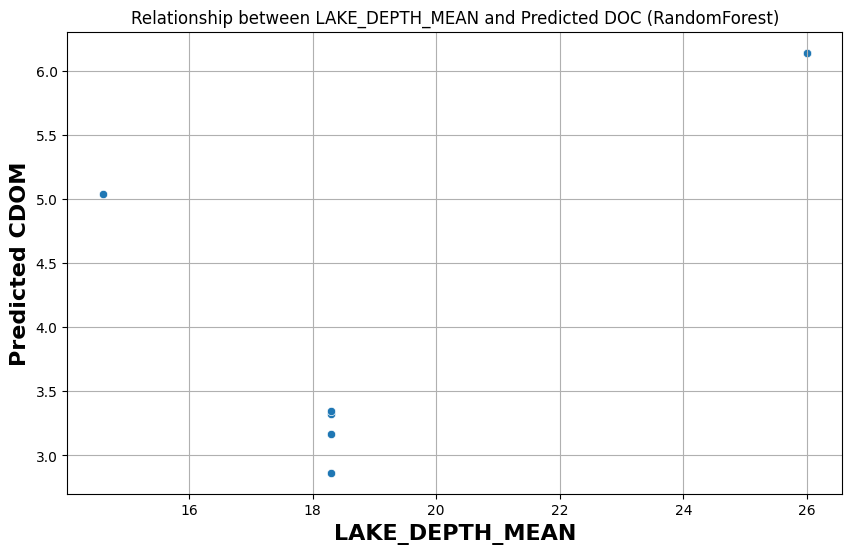

In [34]:
import seaborn as sns

# Define the model you want to analyze (in this case, RandomForest)
model_to_analyze = 'RandomForest'

# Filter the evaluation DataFrame for the specified model
model_evaluation_df = evaluation_df_all[evaluation_df_all['Model'] == model_to_analyze]

# Get the predicted DOC values for the testing data using the selected model
predicted_DOC_values = X_test.copy()  # Copy the testing data
predicted_DOC_values['predicted_CDOM'] = models[model_to_analyze].predict(X_test)  # Predict DOC values

# Create a scatterplot to visualize the relationship between LAKE_DEPTH_MEAN and predicted DOC
plt.figure(figsize=(10, 6))
sns.scatterplot(data=predicted_DOC_values, x='LAKE_DEPTH (m)', y='predicted_CDOM')
plt.title(f'Relationship between LAKE_DEPTH_MEAN and Predicted DOC ({model_to_analyze})')
plt.xlabel('LAKE_DEPTH_MEAN', fontsize=16, fontweight='bold')
plt.ylabel('Predicted CDOM', fontsize=16, fontweight='bold')
plt.grid(True)

# Show the plot
plt.show()

# Plots for the R^2, MSE, RMSE, and MAE 

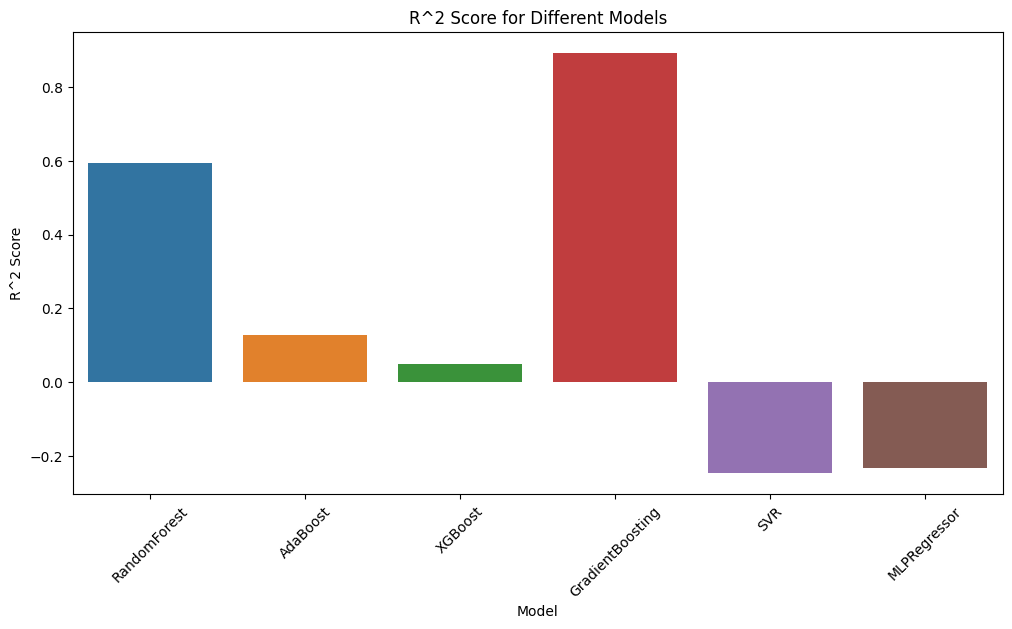

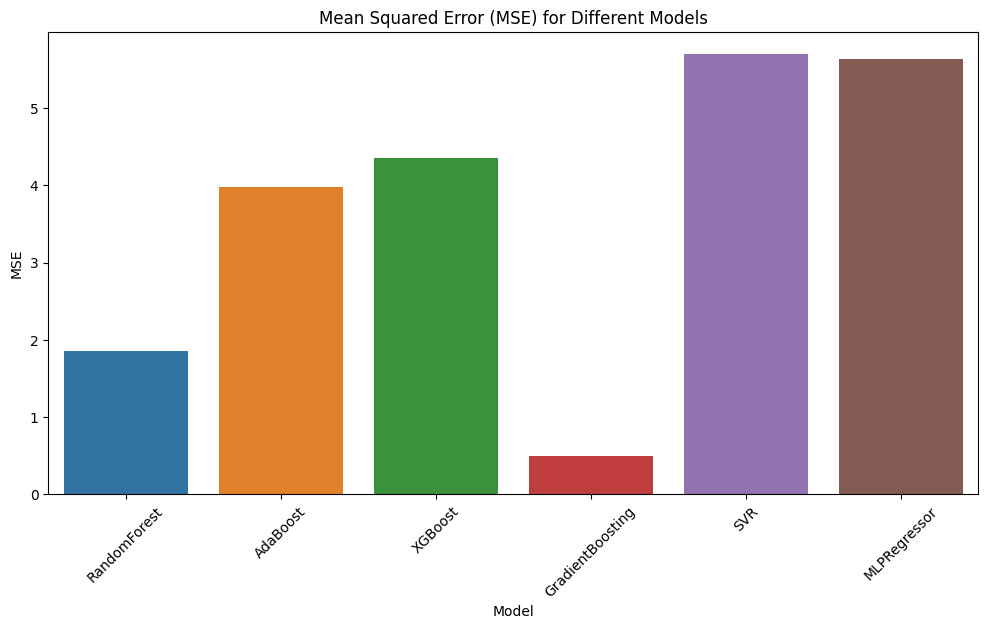

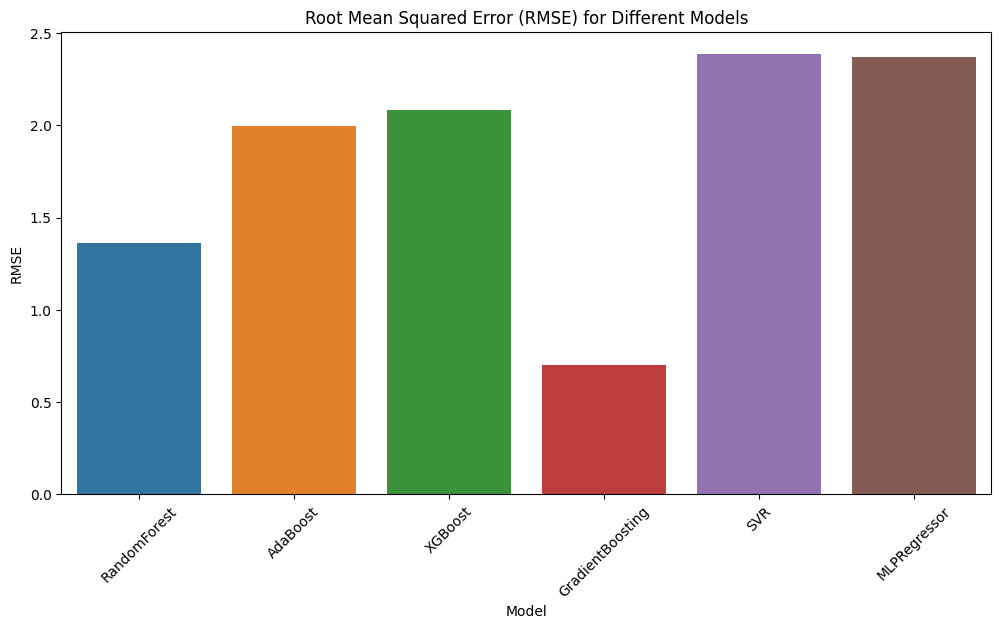

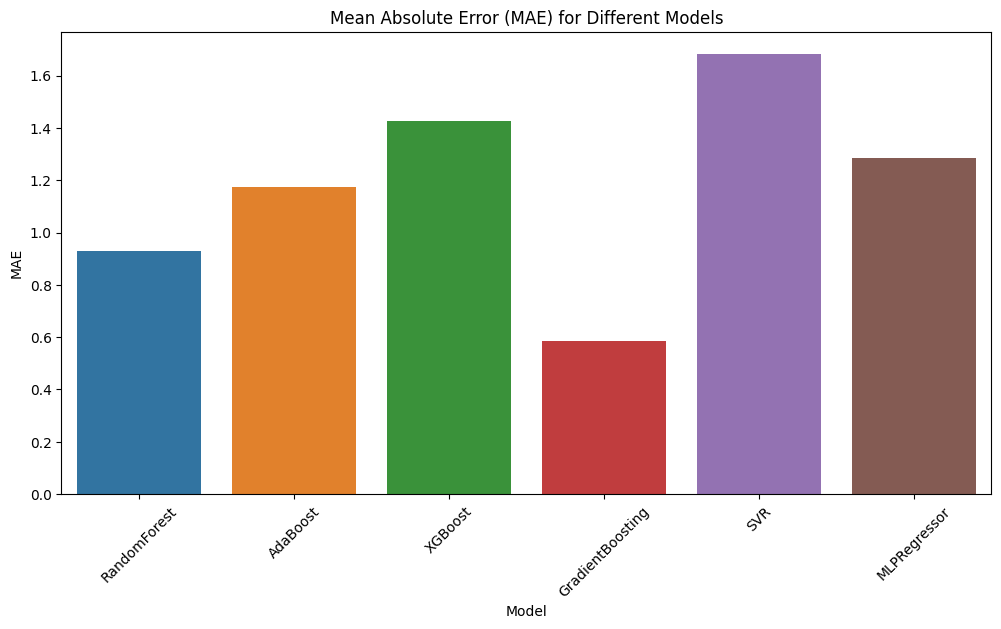

In [35]:
import seaborn as sns

# Plotting evaluation metrics using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='R^2', data=evaluation_df_all)
plt.title('R^2 Score for Different Models')
plt.ylabel('R^2 Score')
plt.xticks(rotation=45)
# plt.xlim(0,1)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='MSE', data=evaluation_df_all)
plt.title('Mean Squared Error (MSE) for Different Models')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='RMSE', data=evaluation_df_all)
plt.title('Root Mean Squared Error (RMSE) for Different Models')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='MAE', data=evaluation_df_all)
plt.title('Mean Absolute Error (MAE) for Different Models')
plt.ylabel('MAE')
plt.xticks(rotation=45)
plt.show()

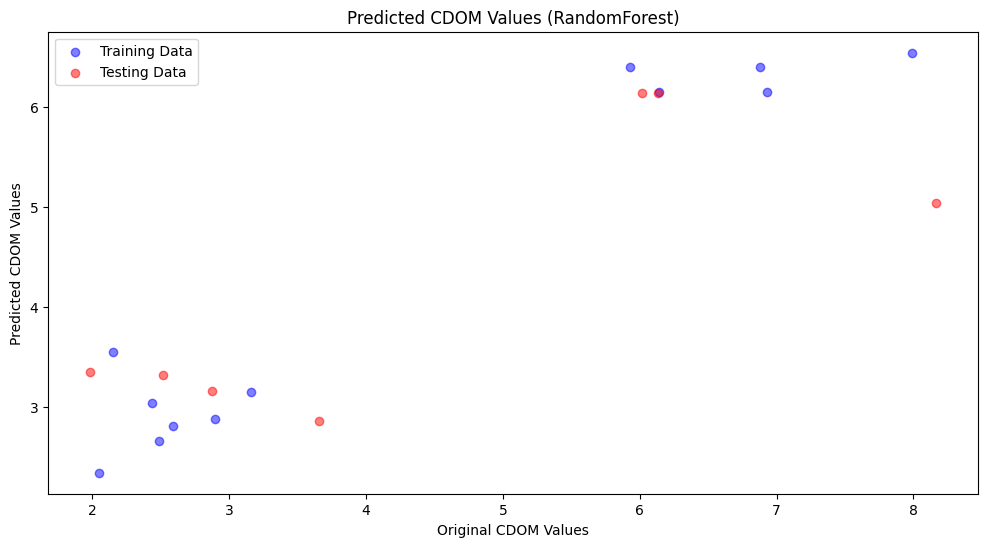

In [36]:
import matplotlib.pyplot as plt

# Train the RandomForest model
random_forest_model = models['RandomForest']
random_forest_model.fit(X_train, y_train)

# Predict CDOM values for the training data
y_train_pred_rf = random_forest_model.predict(X_train)

# Predict CDOM values for the testing data
y_test_pred_rf = random_forest_model.predict(X_test)

# Create DataFrames for the training and testing data with all bands and the predicted values
data_train_rf = X_train.copy()
data_train_rf['original_CDOM'] = y_train
data_train_rf['predicted_CDOM'] = y_train_pred_rf

data_test_rf = X_test.copy()
data_test_rf['original_CDOM'] = y_test
data_test_rf['predicted_CDOM'] = y_test_pred_rf

# Plotting Predicted Training and Testing data (RandomForest) on the same plot
plt.figure(figsize=(12, 6))
plt.scatter(data_train_rf['original_CDOM'], data_train_rf['predicted_CDOM'], label='Training Data', color='blue', alpha=0.5)
plt.scatter(data_test_rf['original_CDOM'], data_test_rf['predicted_CDOM'], label='Testing Data', color='red', alpha=0.5)
plt.xlabel('Original CDOM Values')
plt.ylabel('Predicted CDOM Values')
plt.title('Predicted CDOM Values (RandomForest)')
plt.legend()
plt.show()
